## **Exploratory analysis report**

The exploratory data analysis, or EDA, is a phase in machine learning project allowing to understand the data as well as the relation between the predictive variable and the target. This part allow also to determined the type of problem we have to solve by machine learning. 

This dataset come from Kochan *et al*,2023 which aim to described the winner and loser of reef flattening on Florida's Coral Reef by using comprehensive species- and trait-based approaches to link current estimates of structural complexity and coral cover to current fish diversities and identify trait that predict those density. 

To understand the data set we explored it by descriptive statistics methods as weel as visualisation of the data repartition in function of the relation between the variables and the relations between variables and the target. We choose to explore 2 data sets, the species and the trait, and to divided this report in 2 parts with one for each data set. 

In [64]:
#Library needed for doing the exploratory analysis

#For dataframe manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #This line allow to display the entire variables in a dataframe 

#For the data vizualisation
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv

#??? 
import os
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [49]:
#Importing dataset for the study

#For the species data set
df = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/species.csv", sep=';', index_col='Index')

#For the trait data set
df2= pd.read_excel("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/traits_combined_2023.xlsx")

## Species dataset exploration

In [3]:
df.head(10)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Keys_Divisions,FKNMS,DryTortugas,BNP,CoralECA,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,Marquesas,FKNMS,NaN,NaN,NaN,6483631.0,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,23.578271,577.431946,6.950751,Coral Reef and Hardbottom,Spur and Groove,91742,1057990,-6.0,1048.528198,7731.371094,0,733,Open,37045,43641,8378,1.675894,0,70,126,74.0,74.0,Marquesas,FKNMS,NaN,NaN,NaN,11501368.0,21234.26563,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,23.551355,595.320252,6.950181,Coral Reef and Hardbottom,Pavement,94607,1058988,-7.0,1441.421387,6641.421387,0,733,Open,37170,44078,8548,1.676708,0,70,126,126.0,126.0,Marquesas,FKNMS,NaN,NaN,NaN,12102752.0,13956.82617,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,23.556451,590.443543,6.959807,Coral Reef and Hardbottom,Pavement,96139,1060134,-7.0,1341.421387,5641.421387,0,733,Open,37198,44369,8603,1.696853,0,70,126,126.0,126.0,Marquesas,FKNMS,NaN,NaN,NaN,11003196.0,14876.60742,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,23.567590,579.874023,6.914992,Coral Reef and Hardbottom,Pavement,98167,1061388,-14.0,900.000000,4324.264160,16,733,Open,37685,45235,8752,1.697870,0,70,126,126.0,126.0,Lower Keys,FKNMS,NaN,NaN,NaN,9313051.0,14697.00195,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156
5,5067281_105U,biomass,2005,July,24.466283,-81.786533,26.504821,FLA KEYS,17.620519,1.200000,23.631006,548.318603,7.016505,Coral Reef and Hardbottom,Spur and Groove,95312,1063041,-13.0,400.000000,2041.421387,0,733,Open,38958,46813,9363,1.709672,0,70,126,126.0,126.0,Lower Keys,FKNMS,NaN,NaN,NaN,6948246.5,0.00000,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.408742,7886,0.382,2005,SPGR_LR,FLA KEYS,17.620519,1.200000,4,0.826781
6,5157285_104U,impact,2005,July,24.474067,-81.739067,8.696966,FLA KEYS,25.018963,1.149431,23.673700,547.846313,6.674624,Coral Reef and Hardbottom,Pavement,101151,1067710,-9.0,1082.842773,1389.949463,39,733,Open,39426,48049,9483,1.720457,0,76,126,133.0,133.0,Lower Keys,FKNMS,NaN,NaN,NaN,10456858.0,187408.04690,9.984375,-0.158,-0.129,-0.26,-0.185,855670.2,0.389774,3052,NaN,2005,SPGR_LR,FLA KEYS,25.018963,1.149431,4,0.934887
7,5168534_472U,biomass,2005,June,24.471833,-81.733867,20.300000,FLA KEYS,6.000000,1.300000,23.692407,539.073120,6.896012,Coral Reef and Hardbottom,Pavement,100667,1067974,-18.0,741.421387,965.685425,15,733,Open,39426,48047,948

In [4]:
#look at the info on the dataset to see which type of data it contain as well as the presence of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [5]:
#Look at the variables content meaning multiples different values or unique value.
df.nunique()

site                           3999
model                             2
Year                             12
Month                             8
Latitude                       3984
Longitude                      3969
Depth                          3293
Region                            3
Coral_cover                    2414
Reef_complexity                2814
SST                            3428
NPP                            3660
Wave_exposure                  3673
Habitat_type_classLV0             3
Habitat_type_classLV2             8
Coral_area_UFRTM_20km          3253
Coral_area_UFRTM_200km         3608
Depth_Sbrocco                    64
Deepwater                       787
FSA                            3065
Marina_slips_10km               543
Marina_slips_25km               508
Marine_reserve                    2
Population_20km                1051
Population_50km                1039
Recreational_fishermen_50km    1009
Tourist_fishing                1800
Artificial_reefs_1km        

In [6]:
#Counting the number of missing value in each variables
df.isna().sum()

site                              0
model                             0
Year                              0
Month                             0
Latitude                          0
Longitude                         0
Depth                             0
Region                            0
Coral_cover                     707
Reef_complexity                 707
SST                               0
NPP                               0
Wave_exposure                     0
Habitat_type_classLV0             0
Habitat_type_classLV2             0
Coral_area_UFRTM_20km             0
Coral_area_UFRTM_200km            0
Depth_Sbrocco                     0
Deepwater                         0
FSA                               0
Marina_slips_10km                 0
Marina_slips_25km                 0
Marine_reserve                    0
Population_20km                   0
Population_50km                   0
Recreational_fishermen_50km       0
Tourist_fishing                   0
Artificial_reefs_1km        

## This first look to the data point that:
- Majority of the variables are float or integer and 1/3 are object
- 18 variables shows missing values (see the table above). 
- 4 variables : FKMNS, DryTortugas, BNP, CoralECA shows unique value which are for DryTortugas, BNP, CoralECA NaN value explain by the authors to be non site of respectively dry tortugas, Biscayne National Park sites, Coral Ecological Conservation Area sites. Those variables contain few information and seems to don't be usefull for predicting the diversity index. FKMNS contain more observation but it is only one information about to be a Florida Keys National Marine Sanctuary sites or not which seems to don't be informative for our purpose. 
- The key division represent the sub-juridiction of florida for the study site. This variable contain also many missing value and seems to be redundant with the variable containing the information about the region. 
- the variable total_gravity_intercept is describe by the author to be redundant with the total_gravity.


**Table summarize the cols containing missing values and the description of them by the authors:**

| Features | Number of missing value | Description of the features with missing values |
|:---------:|:-------------------------:|:-----------------------------:|
|Coral_cover|             707| percentage of benthos made up of living hard coral visually estimated by RVC surveyors|
|Reef_complexity  |               707| maximum hard relief measured by averaging the height of the highest rigid point above the lowest point in 8 segments of the cylinder for RVC surveys |
|Total_gravity_intercept  |       103| number of people in population centers within 500km divided by the square of travel time *note from authors : same as Total\_gravity and this column was not used* |
|Total_gravity          |         103| number of people in population centers within 500km divided by the square of travel time |
|Keys_Divisions         |        1429| sub-jurisdictions of Florida Keys including Upper, Middle, Lower Keys and Marquesas; NAs for non Florida Keys sites |
|FKNMS                 |         2341| Florida Keys National Marine Sanctuary sites; *NAs for non Florida Keys sites* |
|DryTortugas           |         3372|Dry Tortugas sites; *NAs for non-Dry Tortugas sites* |
|BNP                   |         3740| Biscayne National Park sites; *NAs for non-BNP sites*|
|CoralECA               |        2635| Coral Ecological Conservation Area sites; *NAs for non-ECA sites (also known as SEFCRI)*|
|connectivity            |        623| number of larva from upstream modeled to a connectivity matrix; *model does not extend to further north reefs and those sites were assigned NAs*|
|Comm_engagement      |            89| metrics of commercial engagement based on landings and permits provided by NOAA|
|Comm_reliance         |           89|metrics of commercial engagement based on landings and permits relative to size of fishing community provided by NOAA|
|Rec_engagement         |          89|metrics of recreational engagement based on landings and permits provided by NOAA|
|Rec_reliance            |         89|metrics of recreational engagement based on landings and permits relative to size of fishing community provided by NOAA|
|Commercial_pounds_landed |         1| annual number of pounds of fish reported by commercial anglers|
|impact                 |        1220|fishing impact variable derived in previous project; *note from the authors: not used in final model*|
|PCT_CORAL               |        707| percent coral cover|
|MAX_HARD_RELIEF          |       707|maximum hard relief meaning the Reef complexity |

*Because of all of those we decided to drop the variables: FKMNS, DryTortugas, BNP, CoralECA, key division, and total_gravity_intercept will drop from the data set to pursue the EDA.* 

In [7]:
#Drop of FKMNS, DryTortugas, BNP, CoralECA, Total_gravity_intercept, and Key_divisions
#the new dataframe is assigned to df1

df1=df.drop(columns=['FKNMS','DryTortugas','BNP','CoralECA','Total_gravity_intercept','Keys_Divisions'])

The categorical variables no.divers, region and habitat_type_classlv0 seems to be important for predicting the diversity index because they represent respectively the diversity index give by the reef visual census, the region of the study sites and the habitat classification according to the FWC unified reef map. We choose the LV0 because it contain more general information about the habitat structure compared to the LV2.  

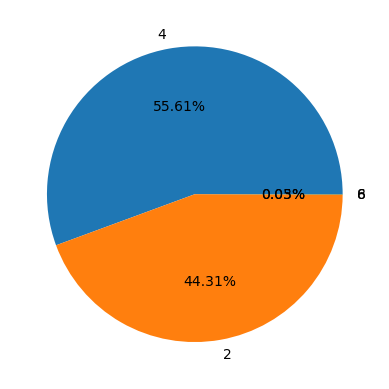

In [8]:
#The repartition of the no.divers 
plt.pie(df1['no.divers'].value_counts(),labels=df1['no.divers'].value_counts().index,autopct='%1.2f%%')
plt.show()

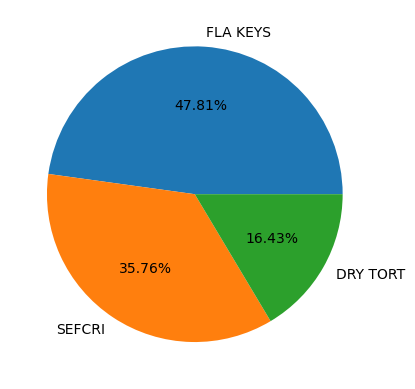

In [9]:
#The repartition of the regions
plt.pie(df1['Region'].value_counts(),labels=df1['Region'].value_counts().index,autopct='%1.2f%%')
plt.show()

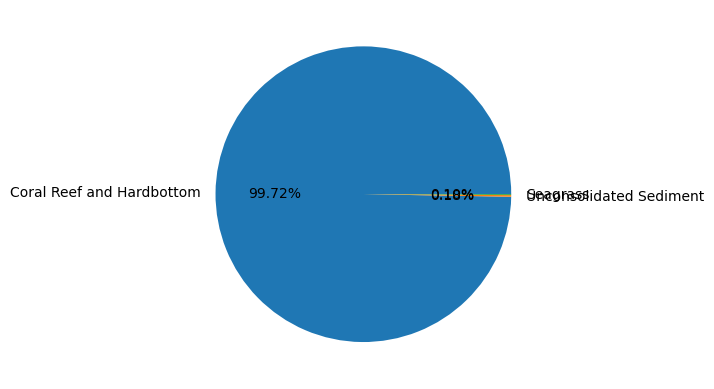

In [10]:
#The repartition of the Habitat_type_classLV0
plt.pie(df1['Habitat_type_classLV0'].value_counts(),labels=df1['Habitat_type_classLV0'].value_counts().index,autopct='%1.2f%%')
plt.show()

These pie charts shows that:
- the data are imbalanced in these variables. 
- the observation are principaly for the categorie 2 and 4 in the no.divers and for the coral reef and hardbottom in the habitat_type_classLV0.
- For the region a majority of the observations are in the FLA key and SEFCRI regions (respectively 47.8% and 35.7%) and less for dry tortuga (16%). 


*If we want to complete the missing value we need to take in account this imbalance in the data.* 

For this reason we plot the variables Coral_cover, Relief_complexity, connectivity, rec_reliance, total_gravity, comm_engagement, comm_reliance, rec_engagement, rec_reliance, coral_pct, max_hard_relief, and impact against the no.divers, region and Habitat_type_classLV0.


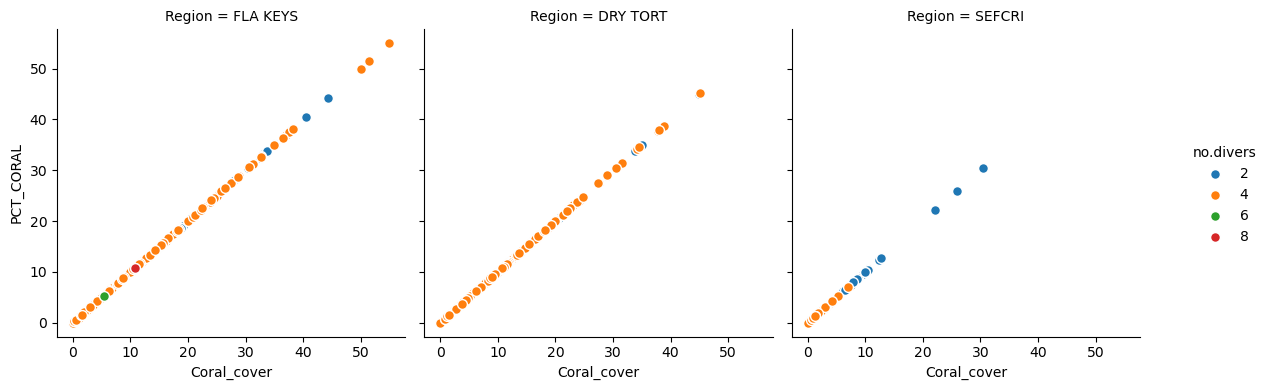

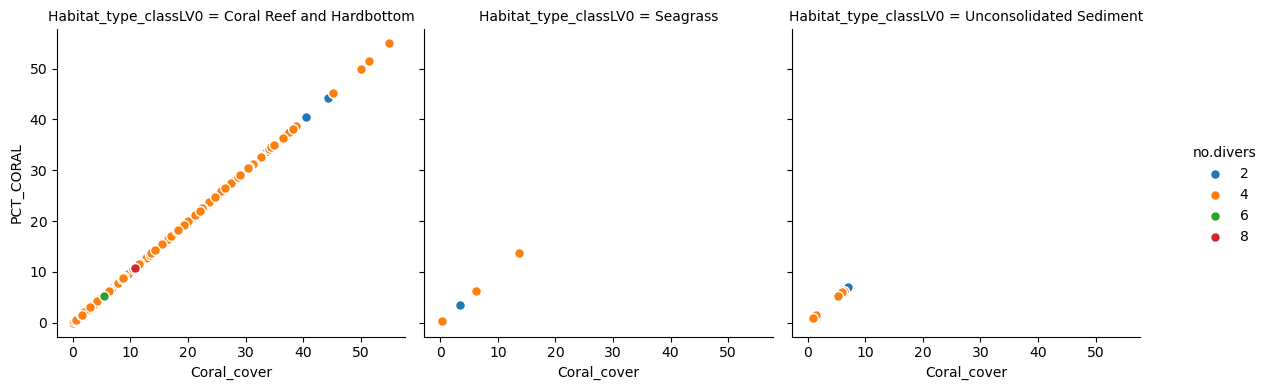

In [11]:
#Relation between the coral_cover and coral_pct with no.divers, region and habitat_type_classLV0

g = sns.FacetGrid(df1, col="Region", hue="no.divers", margin_titles=True, height=4)
g.map(plt.scatter, "Coral_cover",  "PCT_CORAL", edgecolor="white", s=50, lw=1)
g.add_legend()
h = sns.FacetGrid(df1, col="Habitat_type_classLV0", hue="no.divers", margin_titles=True, height=4)
h.map(plt.scatter, "Coral_cover", "PCT_CORAL", edgecolor="white", s=50, lw=1)
h.add_legend()


The PCT_CORAL and coral_cover varaibles shows a linear correlation suggesting they are redundant.
We observed that we get many information about the coral_cover, as well as the PCT_CORAL, for the Habitat_type_classLV0 equal Coral Reef and Hardbottom but not many for the Seagraa and Uncosolidated Sediment. The coral_cover follow different pattern in function of the region. Perhaps, the coral_cover seems to be present in 2 no.divers categories principaly, the 2 and 4. 

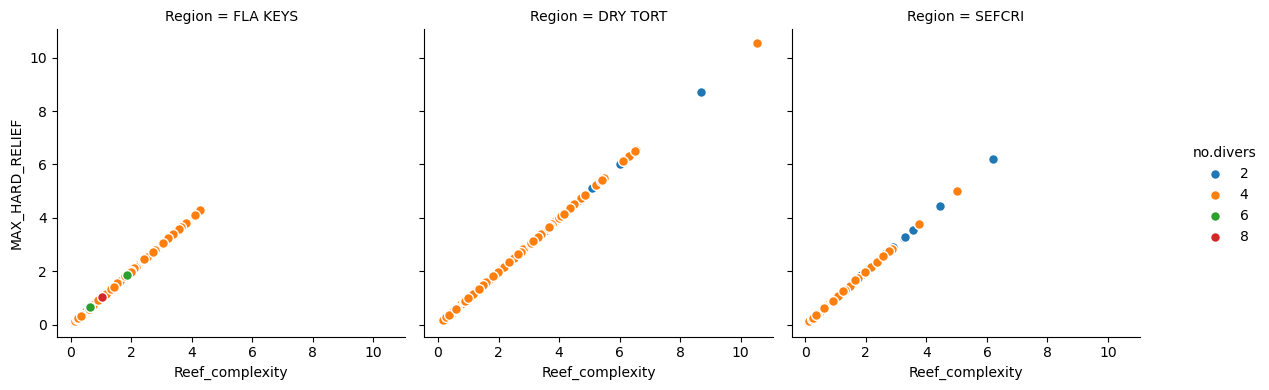

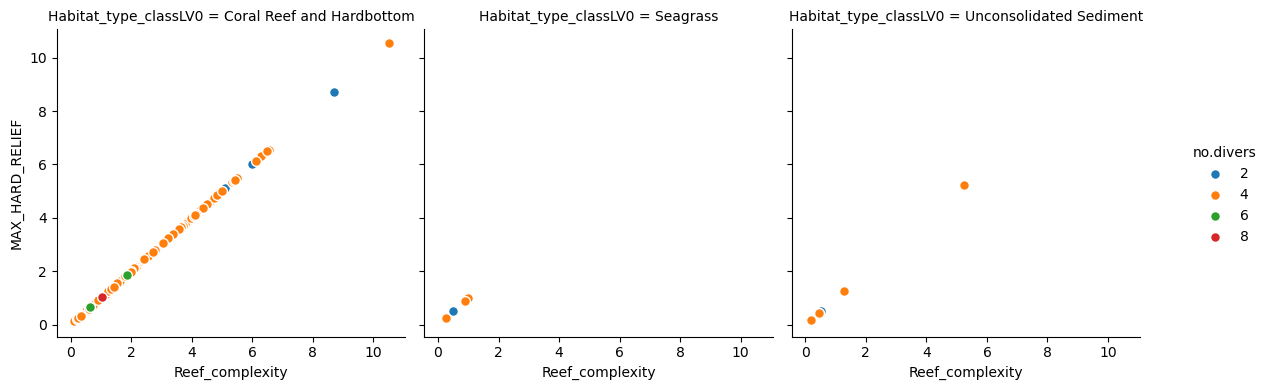

In [12]:
#Relation between the Reef_complexity and MAX_HARD_RELIEF with no.divers, region and habitat_type_classLV0

g = sns.FacetGrid(df1, col="Region", hue="no.divers", margin_titles=True, height=4)
g.map(plt.scatter, "Reef_complexity", "MAX_HARD_RELIEF", edgecolor="white", s=50, lw=1)
g.add_legend()
h = sns.FacetGrid(df1, col="Habitat_type_classLV0", hue="no.divers", margin_titles=True, height=4)
h.map(plt.scatter, "Reef_complexity", "MAX_HARD_RELIEF", edgecolor="white", s=50, lw=1)
h.add_legend()

The MAX_HARD_RELIEF and reef_complexity varaibles shows a linear correlation suggesting they are redundant.
Like for the coral variables we observe a more important information in the Coral Reef and Harbottom categorie of Habitat_type_classLV0 compared to the other categories of the variable. Also, the observation's repartion of the reef_complexity in function of the region shows different pattern. 

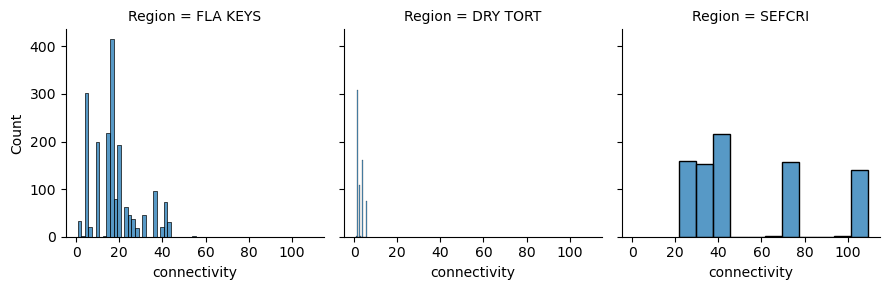

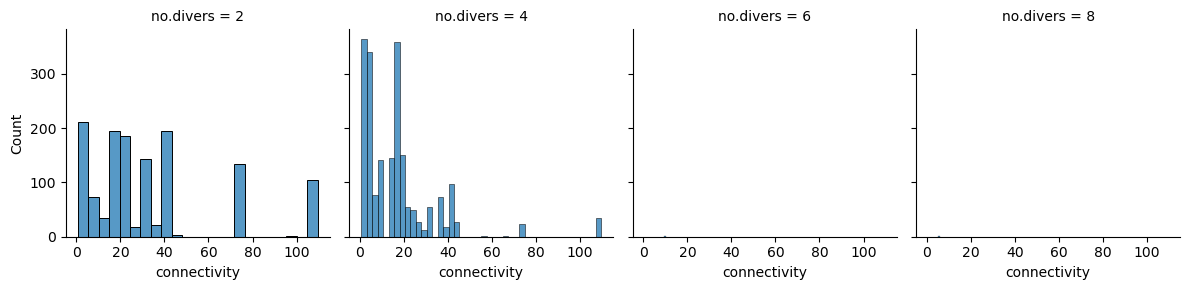

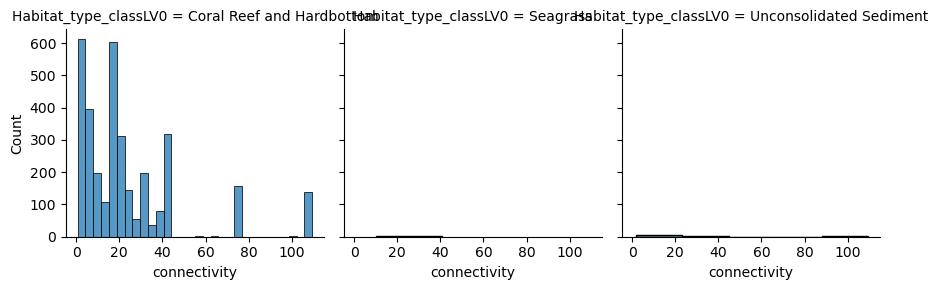

In [13]:
#The relation between region, no.divers, habitat_type_LV0 and connectivity
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"connectivity")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"connectivity")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"connectivity")
plt.tight_layout()
plt.show()

We observed that we have information about connectivity for the region FLA KEY, SEFCRI ; for the no.divers 2 and 4 ; Habitat_type_classLV0 coral reef and harbottom. We see few information about it for the region dry tortuga. 

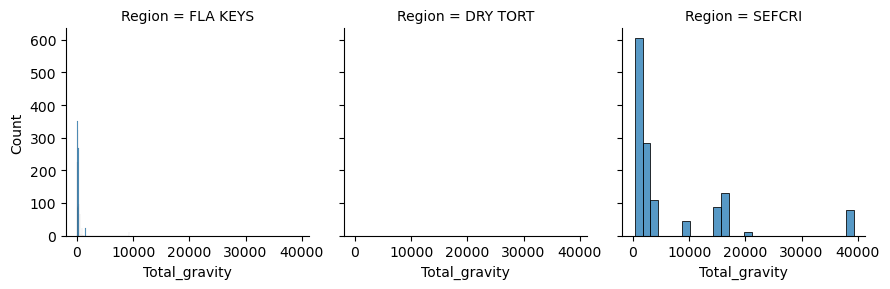

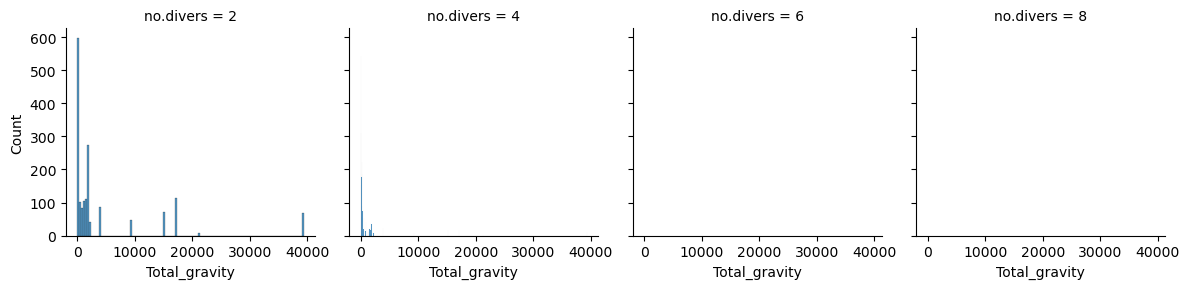

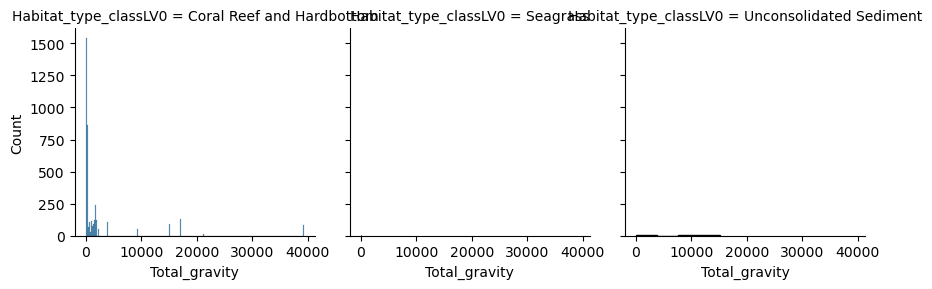

In [14]:
#The relation between region, no.divers, habitat_type_LV0 and Total_gravity
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"Total_gravity")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"Total_gravity")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"Total_gravity")
plt.tight_layout()
plt.show()

Here we can see that the total gravity observation are high for the region SEFCRI, no.divers 2 and 4 as well as the Habitat_type_class_LV0 Coral reef and harbottom. 

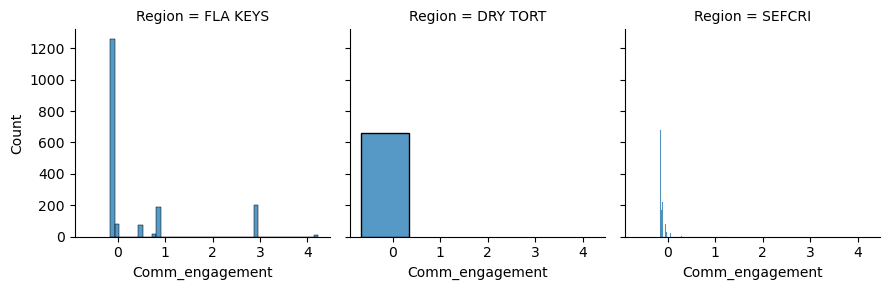

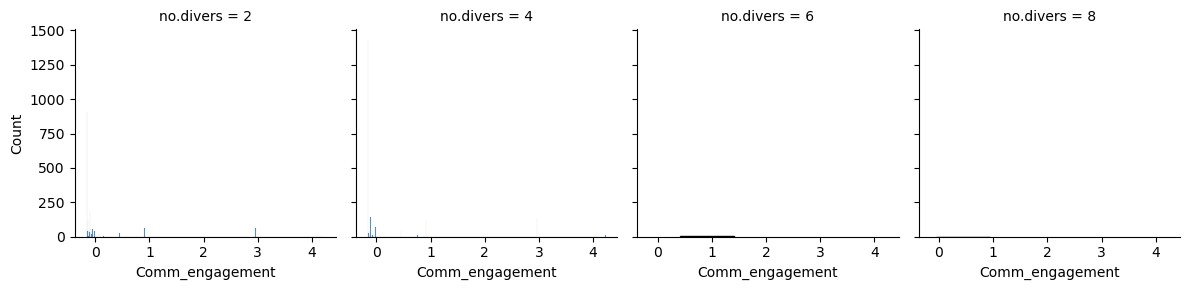

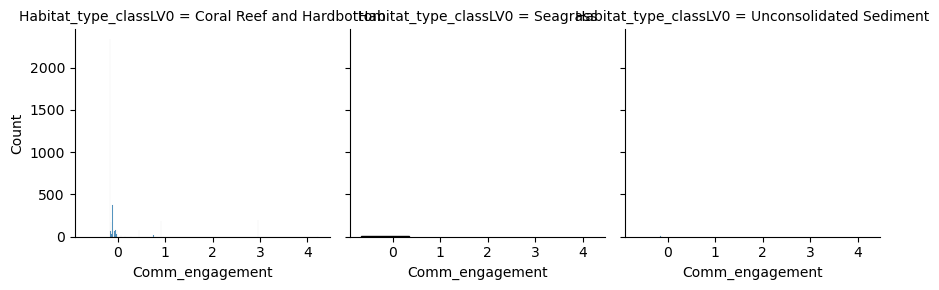

In [15]:
#The relation between region, no.divers, habitat_type_LV0 and Comm_engagement
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"Comm_engagement")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"Comm_engagement")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"Comm_engagement")
plt.tight_layout()
plt.show()

For the Comm_engagement we have information about it principaly for the regions but few for the variable Habitat_type_classLV0 and no.divers. 

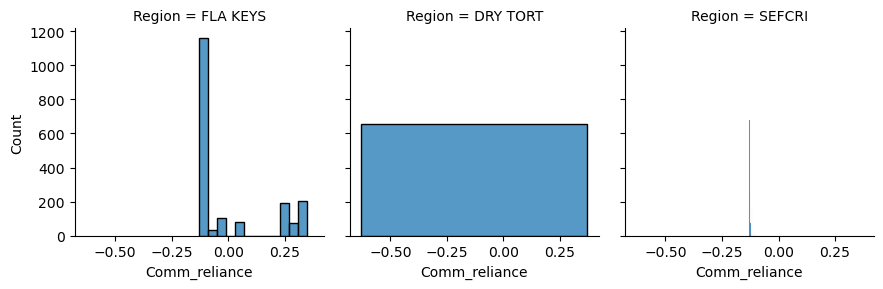

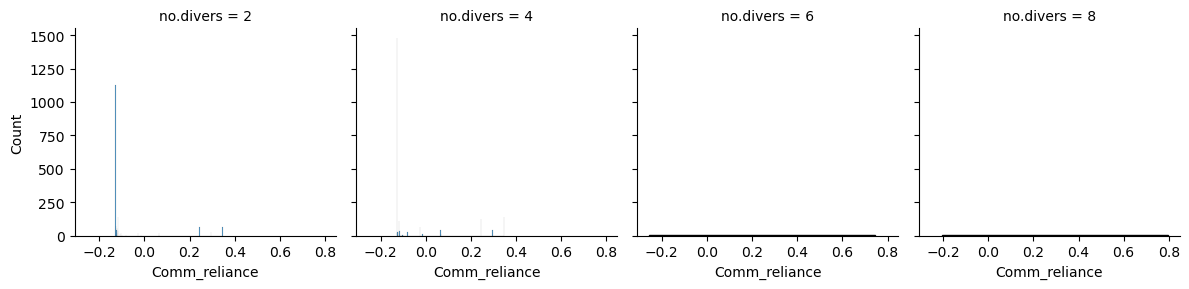

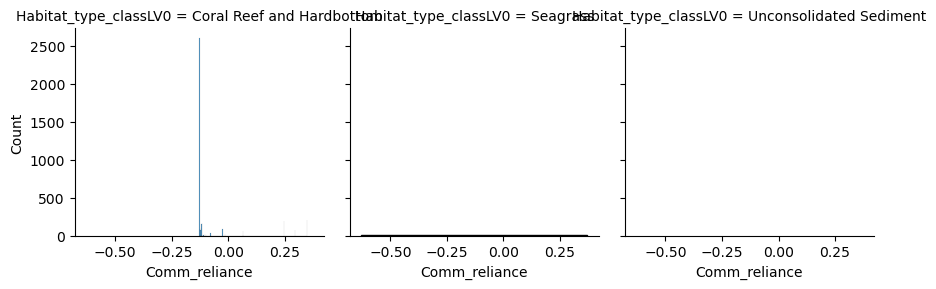

In [16]:
#The relation between region, no.divers, habitat_type_LV0 and Comm_reliance
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"Comm_reliance")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"Comm_reliance")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"Comm_reliance")
plt.tight_layout()
plt.show()

The Comm_reliance is homogeneous for the region dry_tortugas. Also, the region FLA KEY, the no.divers 2 and 4 as well as the habitat_type_classLV0 give us information about the Comm_reliance. 

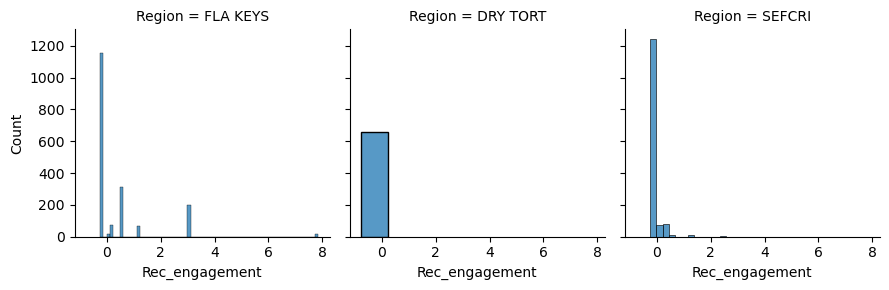

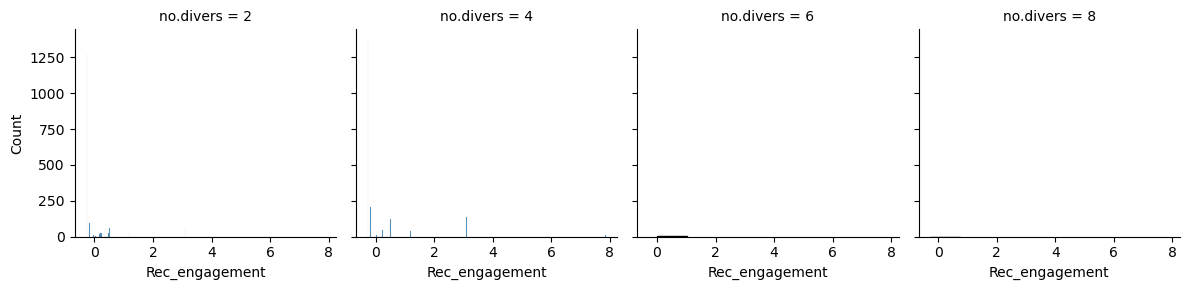

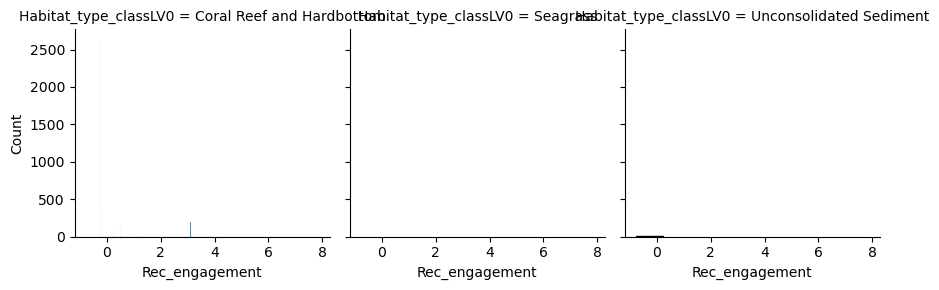

In [17]:
#The relation between region, no.divers, habitat_type_LV0 and Rec_engagement
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"Rec_engagement")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"Rec_engagement")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"Rec_engagement")
plt.tight_layout()
plt.show()

We get principaly information about Rec_engagement for the regions in the other variable the repartition information are lowest. 

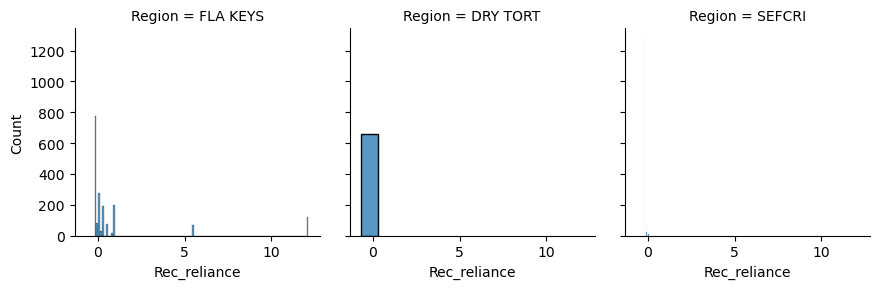

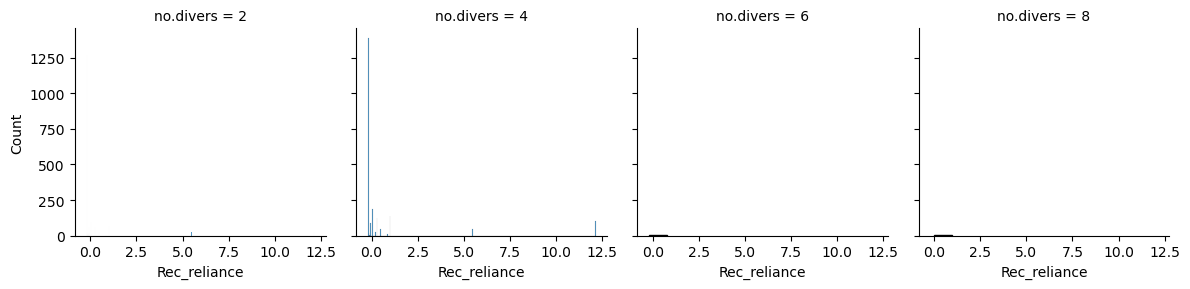

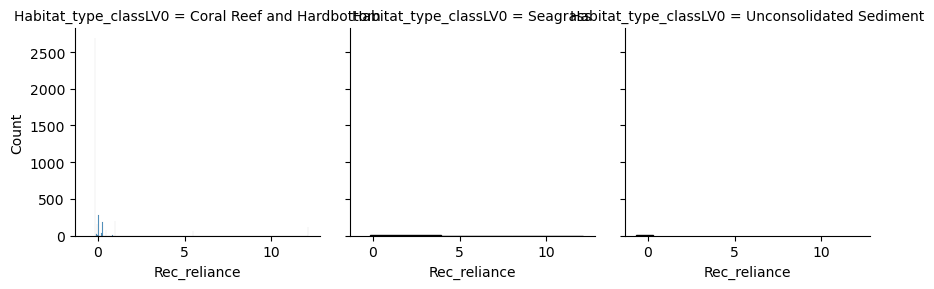

In [18]:
#The relation between region, no.divers, habitat_type_LV0 and Rec_reliance
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"Rec_reliance")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"Rec_reliance")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"Rec_reliance")
plt.tight_layout()
plt.show()

Most of the information for Rec_reliance are related to the region FLA key and dry tortugas as well as the no.divers 4. 

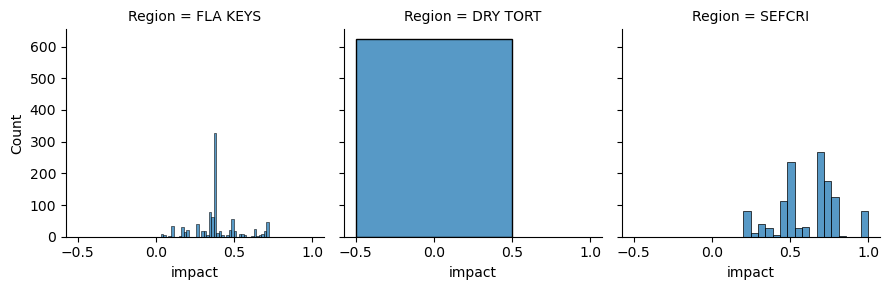

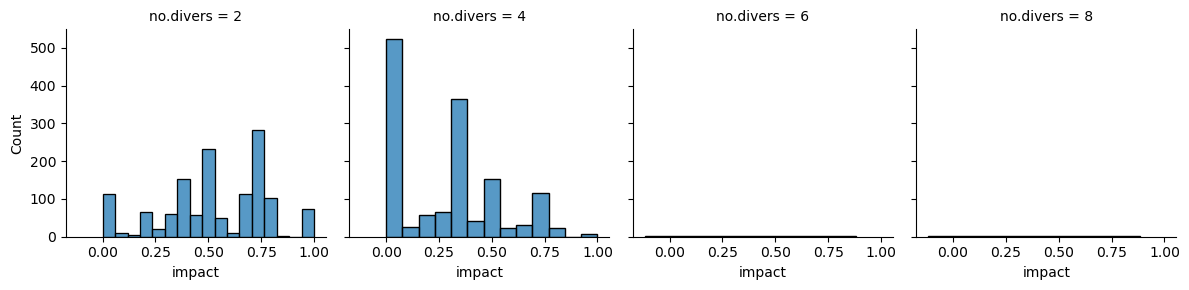

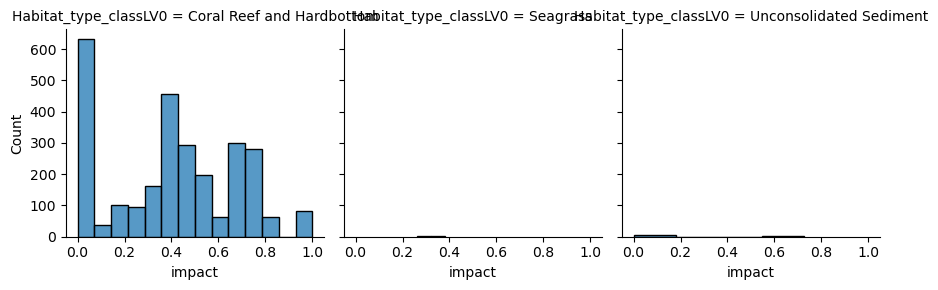

In [19]:
#The relation between region, no.divers, habitat_type_LV0 and impact
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"impact")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"impact")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"impact")
plt.tight_layout()
plt.show()

The impact seems to highly variate in function of the regions. Moreover for the no.divers 2 and 4 as well as the habitat_type_classLV0 related to Coral reef and harbottom gave us informations about it.

*All of those plotting highlight relation between the region, habitat_type_classLV0 and no.divers and the variables Coral_cover, Relief_complexity, connectivity, rec_reliance, total_gravity, comm_engagement, comm_reliance, rec_engagement, rec_reliance, coral_pct, max_hard_relief, and impact.* Those relation seems to be complex but they allow us to replace the missing value by the mean of each variable in function of their relation with region, habitat_type_classLV0 and no.divers. 

In [20]:
#Missing values treatment
df1.loc[df1["Commercial_pounds_landed"].isna(),"Commercial_pounds_landed"] = df1.Commercial_pounds_landed.mean()
for nod in [2, 4, 6]:
    # Calculate the mean of the variables for the given no.divers, regions and Habitat_type_classLV0
    mean_coral_cover = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "Coral_cover"
    ].mean()
    mean_reef_complexity = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "Reef_complexity"
    ].mean()
    mean_connectivity = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "connectivity"
    ].mean()
    mean_total_gravity = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "Total_gravity"
    ].mean()
    mean_comm_engagement = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Comm_engagement"
    ].mean()
    mean_comm_reliance = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Comm_reliance"
    ].mean()
    mean_rec_engagement = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Rec_engagement"
    ].mean()
    mean_rec_reliance = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "Rec_reliance"
    ].mean()
    mean_impact_sefcri = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "SEFCRI"),
        "impact"
    ].mean()
    mean_impact_flakeys = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "FLA KEYS"),
        "impact"
    ].mean()
    mean_impact_drytort = df1.loc[
        (df1["no.divers"] == nod) & ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & (df1["Region"] == "DRY TORT"),
        "impact"
    ].mean()
    mean_pct_coral = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "PCT_CORAL"
    ].mean()
    mean_max_hard_relief = df1.loc[
        (df1["no.divers"] == nod) & (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & (df1["Region"] == "SEFCRI"),
        "MAX_HARD_RELIEF"
    ].mean()
    
    # Fill missing values for the variables
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["Coral_cover"].isna(),
        "Coral_cover"
    ] = mean_coral_cover
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["Reef_complexity"].isna(),
        "Reef_complexity"
    ] = mean_reef_complexity
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["connectivity"].isna(),
        "connectivity"
    ] = mean_connectivity
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["Total_gravity"].isna(),
        "Total_gravity"
    ] = mean_total_gravity
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
        df1["Comm_engagement"].isna(),
        "Comm_engagement"
    ] = mean_comm_engagement
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
        df1["Comm_reliance"].isna(),
        "Comm_reliance"
    ] = mean_comm_reliance
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
        df1["Rec_engagement"].isna(),
        "Rec_engagement"
    ] = mean_rec_engagement
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & df1["Rec_reliance"].isna(),"Rec_reliance"
    ] = mean_rec_reliance
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
		(df1["Region"] == "SEFCRI") & 
        df1["impact"].isna(),
        "impact"
    ] = mean_impact_sefcri
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
		(df1["Region"] == "FLA KEYS") & 
        df1["impact"].isna(),
        "impact"
    ] = mean_impact_flakeys
    df1.loc[
        (df1["no.divers"] == nod) & 
        ((df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") | (df1["Habitat_type_classLV0"] == "Seagrass")) & 
		(df1["Region"] == "DRY TORT") & 
        df1["impact"].isna(),
        "impact"
    ] = mean_impact_drytort
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["PCT_CORAL"].isna(),
        "PCT_CORAL"
    ] = mean_pct_coral
    df1.loc[
        (df1["no.divers"] == nod) & 
        (df1["Habitat_type_classLV0"] == "Coral Reef and Hardbottom") & 
        df1["MAX_HARD_RELIEF"].isna(),
        "MAX_HARD_RELIEF"
    ] = mean_max_hard_relief

In [21]:
#Verification we complete the missing values
df1.isna().sum()

site                           0
model                          0
Year                           0
Month                          0
Latitude                       0
Longitude                      0
Depth                          0
Region                         0
Coral_cover                    0
Reef_complexity                0
SST                            0
NPP                            0
Wave_exposure                  0
Habitat_type_classLV0          0
Habitat_type_classLV2          0
Coral_area_UFRTM_20km          0
Coral_area_UFRTM_200km         0
Depth_Sbrocco                  0
Deepwater                      0
FSA                            0
Marina_slips_10km              0
Marina_slips_25km              0
Marine_reserve                 0
Population_20km                0
Population_50km                0
Recreational_fishermen_50km    0
Tourist_fishing                0
Artificial_reefs_1km           0
SG_permits_50km                0
SG_charter_permits_25km        0
Total_grav

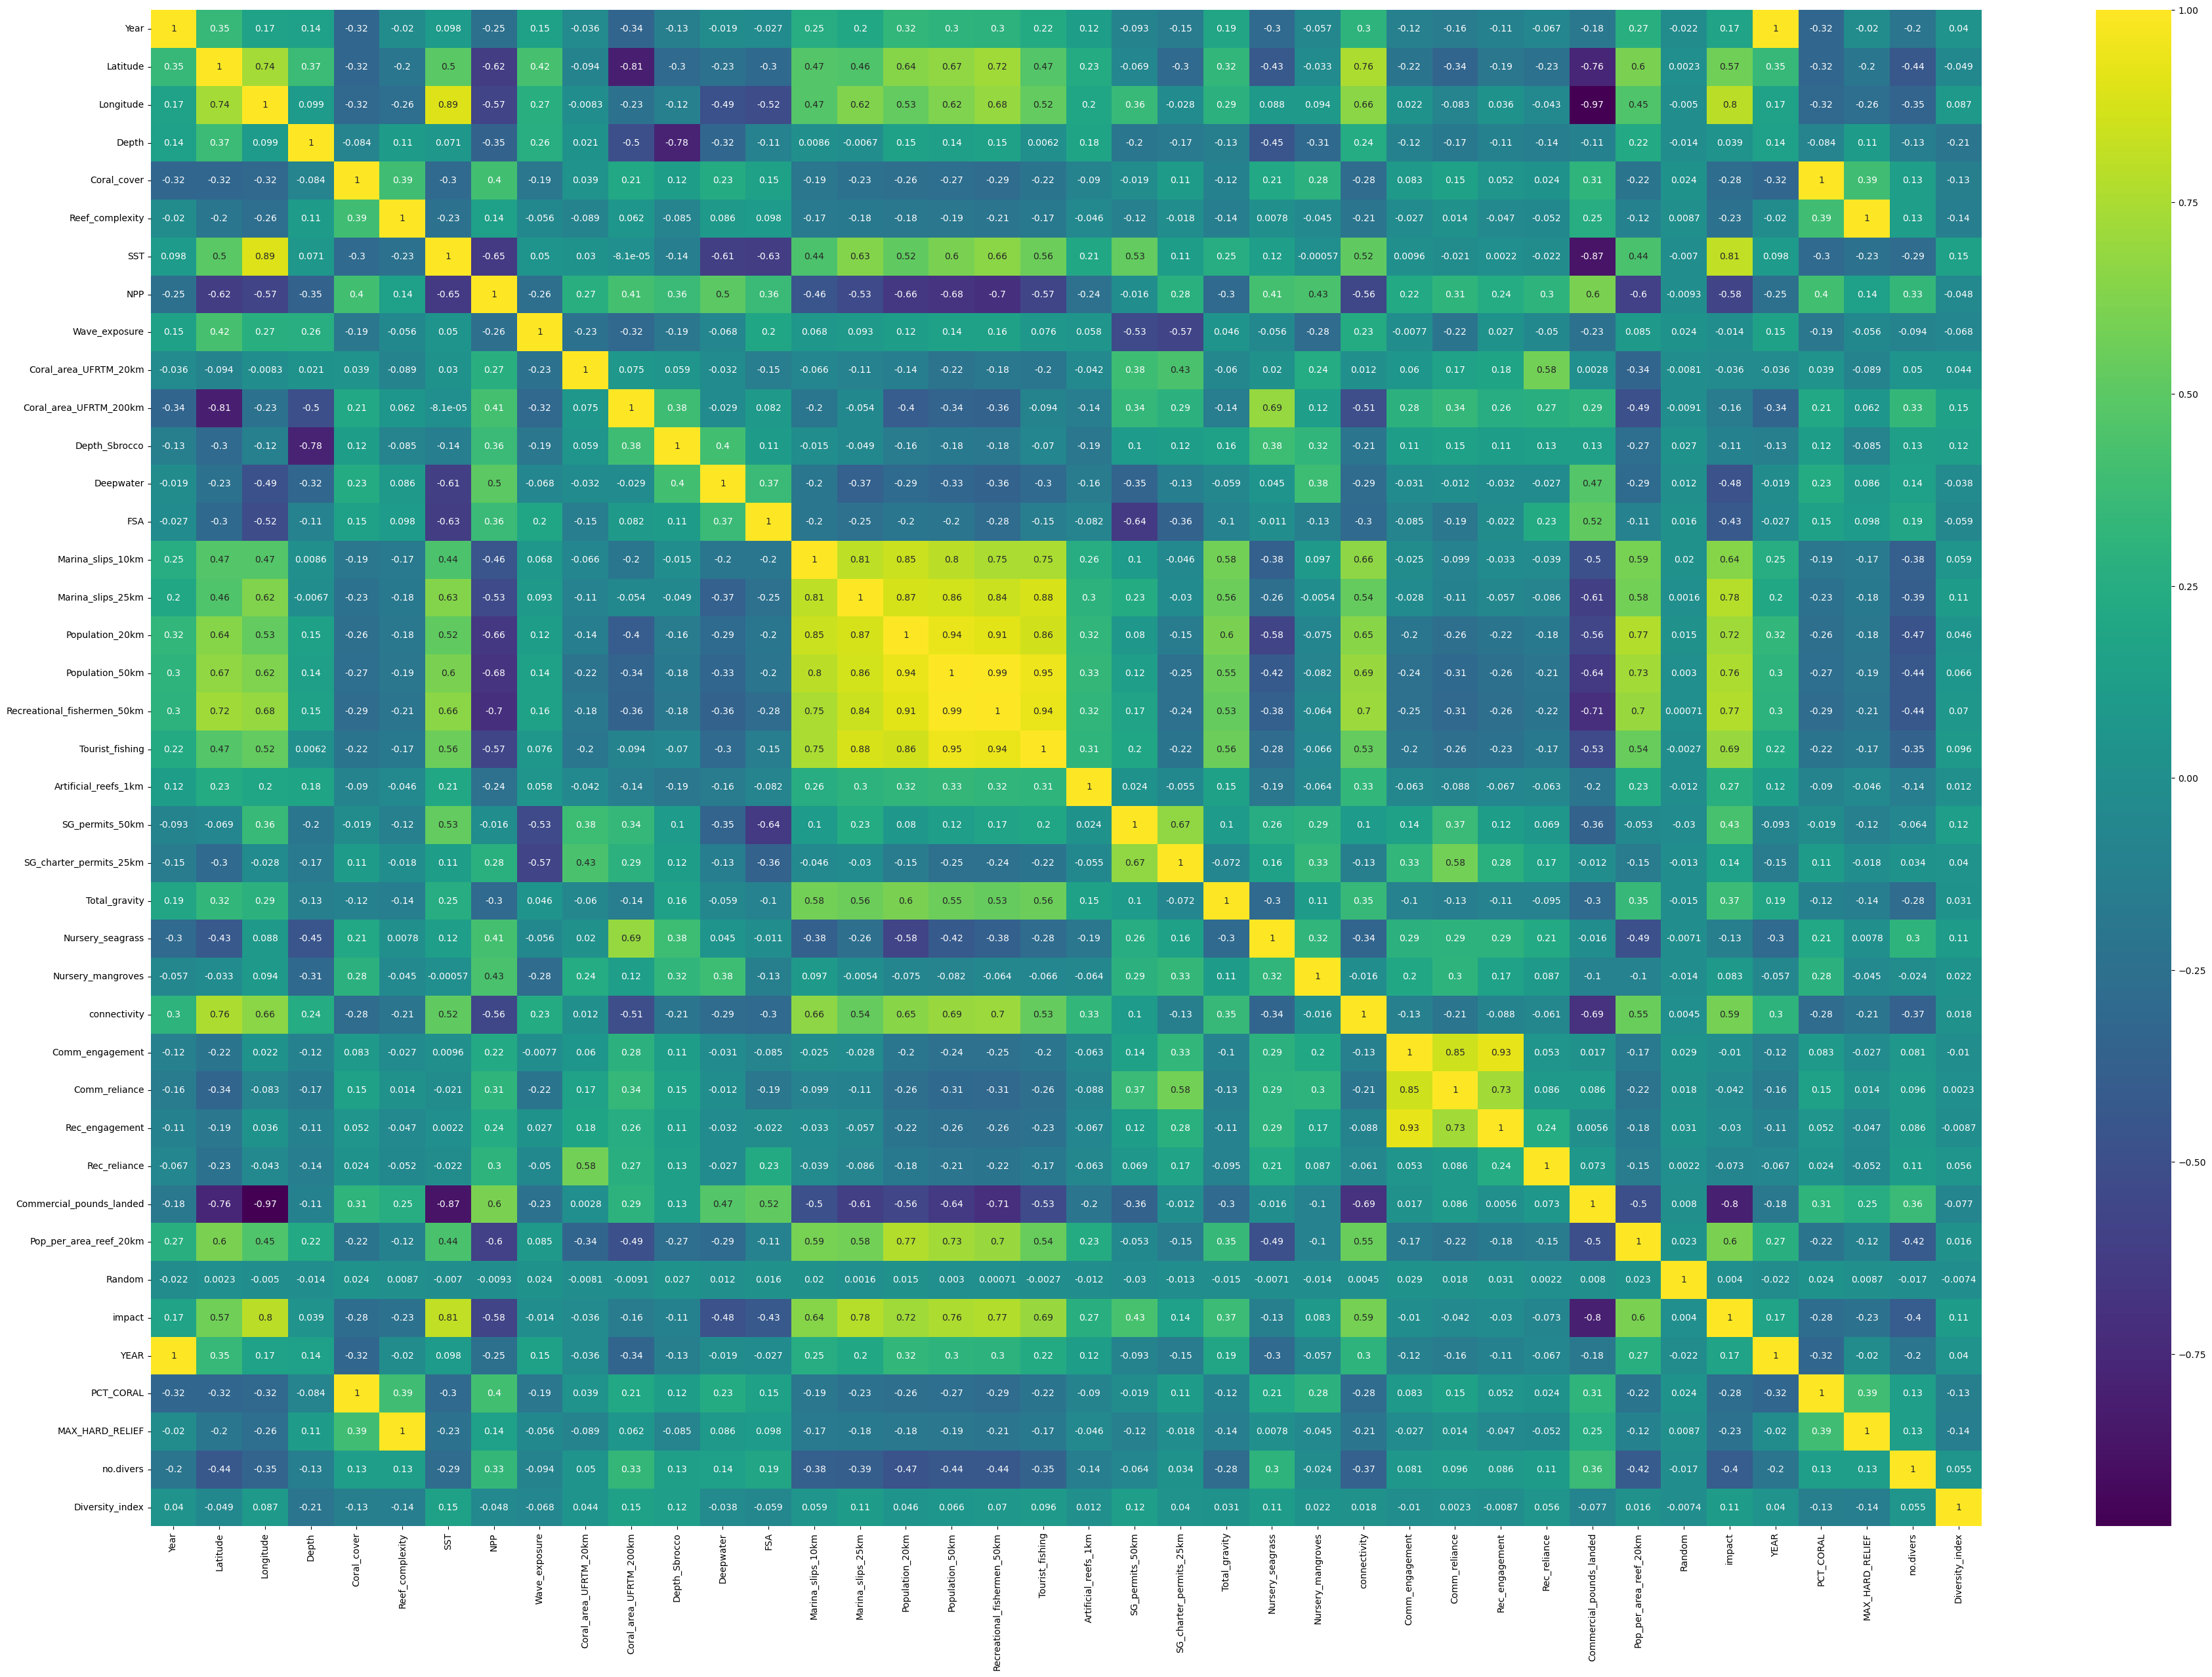

In [22]:
#Visualisation of the correlation between the numerical variable

#The data set is divided in 2 where one will contain the categorical variables and the second the numerical variables
categorical_data=df1.select_dtypes(include=['object'])
numerical_data=df1.select_dtypes(include=[np.number])

plt.figure(figsize=(45,30))
sns.heatmap(numerical_data.corr(),cbar=True,annot=True,cmap='viridis')
plt.show()

This correlation matrix highlight that:
- in general the correlation between the diversity index and the other variables are weak not less that -0.2 and no more than 0.2. 
- he exist a positive correlation between the diversity index and SST, Coral_aera_UFRTM_20km, Depth_Sbrocco, Marina_slips_10km, SG_permit_50km, Nursery_seagrass, impact
- he exist a negative correlation between the diversity index and PCT_CORAL, MAX_HARD_RELIEF, Depth, Coral_cover, Reef_complexity. 

In [23]:
numerical_data.columns

Index(['Year', 'Latitude', 'Longitude', 'Depth', 'Coral_cover',
       'Reef_complexity', 'SST', 'NPP', 'Wave_exposure',
       'Coral_area_UFRTM_20km', 'Coral_area_UFRTM_200km', 'Depth_Sbrocco',
       'Deepwater', 'FSA', 'Marina_slips_10km', 'Marina_slips_25km',
       'Population_20km', 'Population_50km', 'Recreational_fishermen_50km',
       'Tourist_fishing', 'Artificial_reefs_1km', 'SG_permits_50km',
       'SG_charter_permits_25km', 'Total_gravity', 'Nursery_seagrass',
       'Nursery_mangroves', 'connectivity', 'Comm_engagement', 'Comm_reliance',
       'Rec_engagement', 'Rec_reliance', 'Commercial_pounds_landed',
       'Pop_per_area_reef_20km', 'Random', 'impact', 'YEAR', 'PCT_CORAL',
       'MAX_HARD_RELIEF', 'no.divers', 'Diversity_index'],
      dtype='object')

In [24]:
#to visualized the relation between the variables cited above and the diversity index. 
px.imshow(numerical_data.loc[:, ['Diversity_index','SST','Coral_area_UFRTM_20km', 'Depth_Sbrocco', 'Marina_slips_10km', 'SG_permits_50km', 'Nursery_seagrass', 'impact', 'PCT_CORAL', 'MAX_HARD_RELIEF', 'Depth', 'Coral_cover', 'Reef_complexity']].corr())

Above we observed that, the correlation between those variables are highest between them compared to each variable against the diversity suggesting it is the relation between the variable which make their correlation with the diversity index. 

To understand why the correlation between the diversity index and the predictives variables in the data set are weak compared to the relation between the variables them self we plot the diversity index to see how is the values repartition. 

In [25]:
#descriptive statistics on the diversity index
df1['Diversity_index'].describe()

count    3999.000000
mean        0.831469
std         0.114777
min         0.000000
25%         0.811582
50%         0.867035
75%         0.900148
max         0.956324
Name: Diversity_index, dtype: float64

In [26]:
#the repartition of the diversity index values
px.scatter(data_frame=df1['Diversity_index'])

In [27]:
#Repartition of the diversity index in fonction of geographical space of the study sites

fig = px.scatter_mapbox(df1, lat="Latitude", lon="Longitude", hover_data=None,
                        color_discrete_sequence=["fuchsia"], zoom=4, height=400,color="Diversity_index")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

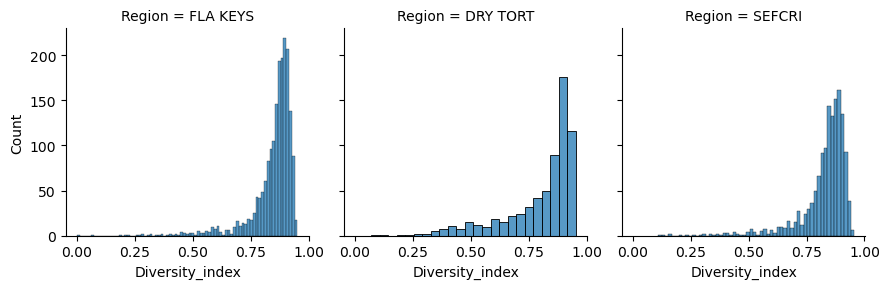

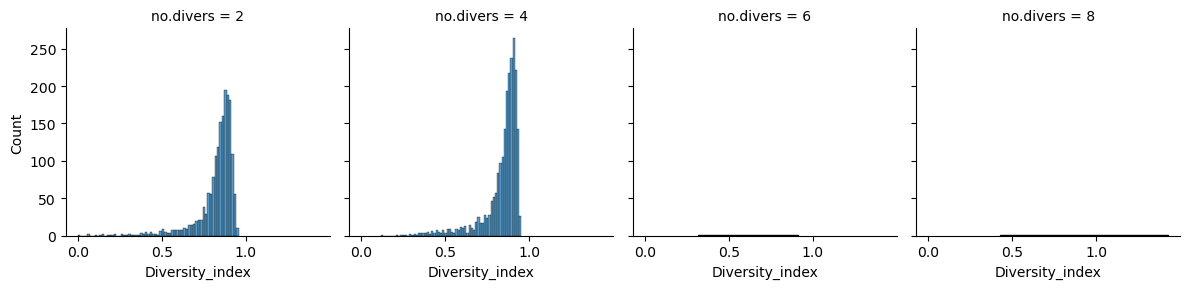

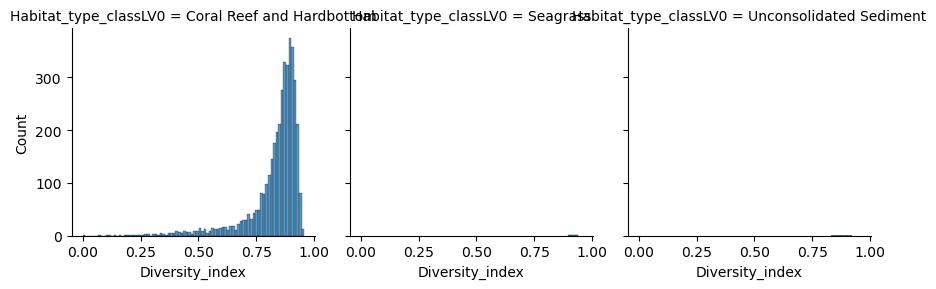

In [28]:
#repartition of the diversity index agains the region, habitat_type_classLV0 and the no.divers
g = sns.FacetGrid(data=df1,col="Region")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="no.divers")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=df1,col="Habitat_type_classLV0")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

All of those plotting highlight that : 
- the diversity index values seems to be concentrate around 0.8 where the quartiles 1 and the mean are close to this value and the quartile 3 is equal to 0.9.
- with the scatter plot we observed only few observation below 0.7 and the majority are concentrate between 0.8 and 0.9. 
- the repartition of the index in function of the geographical space seems to be homogeneous
- the repartition of the index agains the region, no.divers and the habitat follow a similar pattern compared to what we observed for Coral_cover, Relief_complexity, connectivity, rec_reliance, total_gravity, comm_engagement, comm_reliance, rec_engagement, rec_reliance, coral_pct, max_hard_relief, and impact. 

This suggest to predict the diversity index we need to take in account the regions, the no.divers and the habitat. After that we take a look to the diversity index values below and above the mean to see their repartition in function of the region, no.divers and habitat. 

In [29]:
#observation below the quartile 1 and associated with a low diversity meaning under 0.7
low_div_ind = df1[df1.Diversity_index < 0.7]
low_div_ind
#represent 390 observation over the 3999 (10%)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,5292333_457U,biomass,2005,June,24.560250,-81.669250,2.900000,FLA KEYS,7.500000,1.850000,23.402490,1207.332764,6.538975,Coral Reef and Hardbottom,Pavement,166421,1085235,-5.0,8841.420898,12619.595700,342,745,Open,41170,48057,9484,1.720457,0,76,177,0.0,2.697471e+07,6.042246e+06,1.951333,0.911,0.244,0.515,0.277,855670.2,0.247385,2347,0.396981,2005,ISOL_MR,FLA KEYS,7.500000,1.850000,2,0.602384
20,5457301_143U,impact,2005,August,24.504217,-81.581967,25.902296,FLA KEYS,10.723639,1.867517,23.789880,543.846863,7.139215,Coral Reef and Hardbottom,Aggregate Reef,122361,1092176,-16.0,741.421387,1707.106812,0,753,Open,14669,48057,9484,1.720457,0,76,177,84.0,2.411588e+07,2.792819e+05,9.863776,0.911,0.244,0.515,0.277,855670.2,0.119883,6468,0.382000,2005,SPGR_LR,FLA KEYS,10.723639,1.867517,6,0.313606
23,5532305_632U,impact,2005,July,24.511067,-81.541817,27.700000,FLA KEYS,2.000000,1.400000,23.808069,569.532410,7.187880,Coral Reef and Hardbottom,Aggregate Reef,121535,1098330,-20.0,200.000000,3038.477539,0,434,Open,6637,49777,9837,1.836443,0,76,177,84.0,2.684920e+07,6.761283e+04,9.863776,0.911,0.244,0.515,0.277,855670.2,0.054610,8539,0.184000,2005,SPGR_LR,FLA KEYS,2.000000,1.400000,2,0.343428
28,7246232_126U,biomass,2005,June,24.830317,-80.639617,27.259494,FLA KEYS,3.040506,1.604051,23.783624,599.109802,7.426018,Coral Reef and Hardbottom,Pavement with Sand Channels,51363,1160076,-14.0,382.842712,17942.134770,189,1172,Open,4919,27836,7253,1.532031,0,46,71,222.0,2.949098e+07,2.468897e+05,30.685492,2.960,0.347,3.101,0.995,613278.2,0.095769,6772,0.387980,2005,SPGR_LR,FLA KEYS,3.040506,1.604051,4,0.447375
35,7377506_124U,impact,2005,June,24.875050,-80.568967,17.248803,FLA KEYS,2.000000,1.100798,23.877924,594.688110,7.472660,Coral Reef and Hardbottom,Pavement with Sand Channels,52762,1160365,-22.0,565.685425,8788.225586,473,1645,Open,9603,21314,5899,1.238403,1,46,71,185.0,3.145281e+07,3.427248e+05,14.894444,2.960,0.347,3.101,0.995,613278.2,0.182006,223,0.387980,2005,SPGR_LR,FLA KEYS,2.000000,1.100798,4,0.523190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,393197_3021U,impact,2018,August,26.920268,-80.038905,20.949791,SEFCRI,0.000000,0.676148,23.804132,461.913574,7.503066,Coral Reef and Hardbottom,Ridge,161392,392115,-22.0,4382.842773,3189.949463,56,686,Open,258151,1225148,57346,3.507123,0,34,39,969.0,0.000000e+00,2.882490e+05,53.018750,-0.148,-0.124,-0.260,-0.185,170631.4,1.599528,6017,0.482000,2018,DPRC,SEFCRI,0.000000,0.676148,2,0.666667
3945,428640_3512U,biomass,2018,August,26.895861,-80.029213,22.550751,SEFCRI,0.753754,0.124625,23.852228,419.559631,7.517765,Coral Reef and Hardbottom,Ridge,164119,397368,-23.0,3400.000000,4241.421387,69,644,Open,288329,1231137,58335,3.608053,0,35,39,969.0,0.000000e+00,3.139168e+05,53.018750,-0.158,-0.129,-0.260,-0.185,170631.4,1.756829,9632,0.485000,2018,DPRC,SEFCRI,0.753754,0.124625,2,0.667984
3962,854887_1276U,biomass,2018,September,24.452752,-81.857352,19.096762,FLA KEYS,4.012381,1.648762,23.623468,554.132507,6.952187,Coral Reef and Hardbottom,Spur and Groove,89221,1056004,-15.0,641.421387,8069.848633,0,723,Open,36705,43049,8195,1.668975,0,70,1

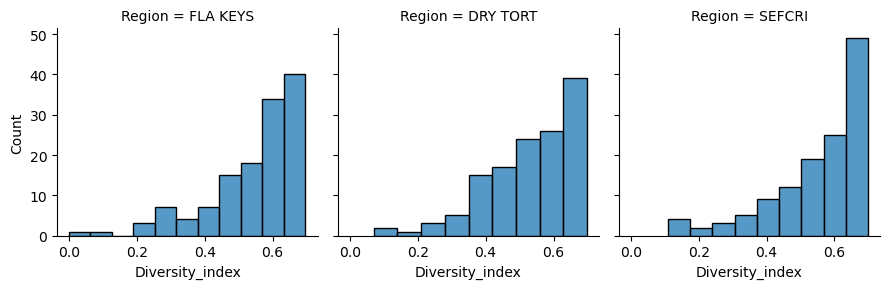

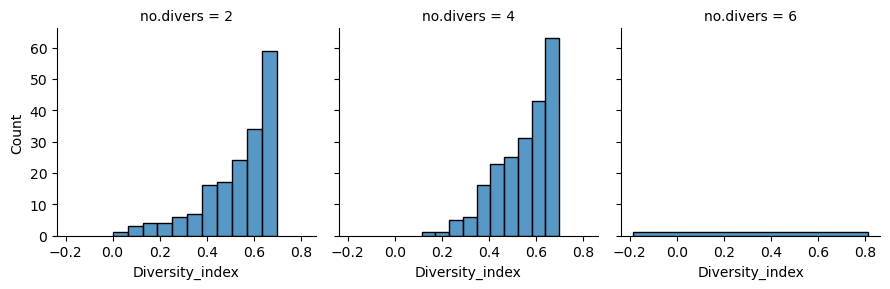

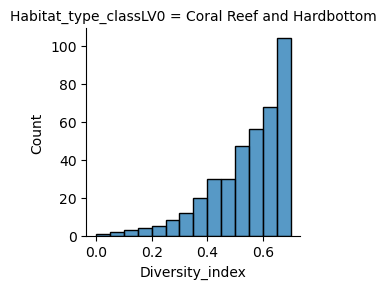

In [30]:
#in function of the region, no.divers and habitat
g = sns.FacetGrid(data=low_div_ind,col="Region")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=low_div_ind,col="no.divers")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=low_div_ind,col="Habitat_type_classLV0")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

In [38]:
#observation around the mean value 
#the between() attribute allow to select the observation between the 2 values inside the parenthesis
mean_div_ind = df1[df1.Diversity_index.between(0.7,0.9)]
mean_div_ind
#represent 2606 observations over the 3999 (65%)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.260,-0.185,1511066.2,0.047128,3786,0.205000,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,23.551355,595.320252,6.950181,Coral Reef and Hardbottom,Pavement,94607,1058988,-7.0,1441.421387,6641.421387,0,733,Open,37170,44078,8548,1.676708,0,70,126,126.0,1.210275e+07,13956.82617,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.392888,3430,0.387980,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,23.556451,590.443543,6.959807,Coral Reef and Hardbottom,Pavement,96139,1060134,-7.0,1341.421387,5641.421387,0,733,Open,37198,44369,8603,1.696853,0,70,126,126.0,1.100320e+07,14876.60742,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.386919,3696,0.387980,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,23.567590,579.874023,6.914992,Coral Reef and Hardbottom,Pavement,98167,1061388,-14.0,900.000000,4324.264160,16,733,Open,37685,45235,8752,1.697870,0,70,126,126.0,9.313051e+06,14697.00195,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.383887,4090,0.387980,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156
5,5067281_105U,biomass,2005,July,24.466283,-81.786533,26.504821,FLA KEYS,17.620519,1.200000,23.631006,548.318603,7.016505,Coral Reef and Hardbottom,Spur and Groove,95312,1063041,-13.0,400.000000,2041.421387,0,733,Open,38958,46813,9363,1.709672,0,70,126,126.0,6.948246e+06,0.00000,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.408742,7886,0.382000,2005,SPGR_LR,FLA KEYS,17.620519,1.200000,4,0.826781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2065262_3278U,impact,2018,September,25.770183,-80.087650,17.953469,SEFCRI,1.000000,0.834130,24.261774,453.504700,7.363275,Coral Reef and Hardbottom,Individual or Aggregated Patch Reef,76608,972777,-27.0,200.000000,3752.691162,935,3615,Open,924228,3882796,128369,54.825044,0,53,17,1137.0,3.750273e+06,353222.28130,23.764472,-0.105,-0.128,-0.260,-0.185,318050.4,12.064380,6958,0.709000,2018,APRD,SEFCRI,1.000000,0.834130,2,0.829341
3995,1223281_1188U,impact,2018,September,24.580356,-81.303040,7.148084,FLA KEYS,1.246807,0.498723,23.749170,583.637329,7.319593,Coral Reef and Hardbottom,Pavement,146627,1164044,-7.0,1900.000000,3662.741699,23,561,Open,6281,45292,9544,1.779467,0,91,62,110.0,1.641656e+07,489712.90630,28.308633,-0.013,-0.027,-0.185,-0.056,855670.2,0.042837,7602,0.396981,2018,CONT_LR,FLA KEYS,1.246807,0.498723,2,0.831818
3996,2003949_1803U,biomass,2018,September,25.590833,-80.096706,2.455478,FLA KEYS,1.795652,0.535043,24.121240,553.635559,7.216960,Coral Reef and Hardbottom,Aggregate Reef,40370,1045473,-17.0,600.000000,16131.371090,0,2615,Open,16262,2940764,99823,

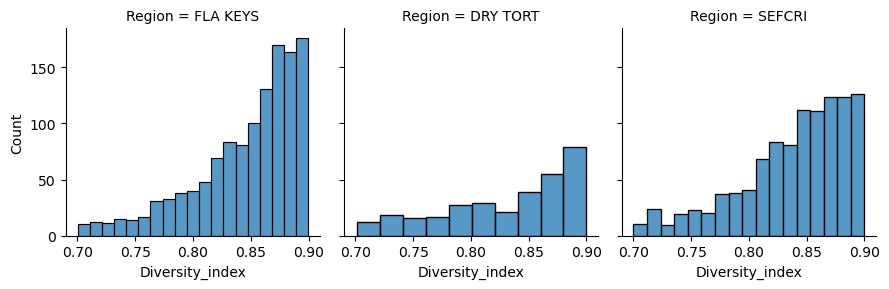

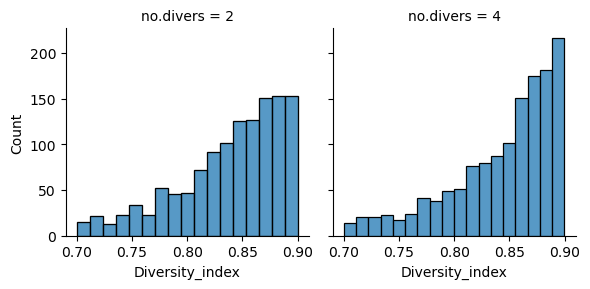

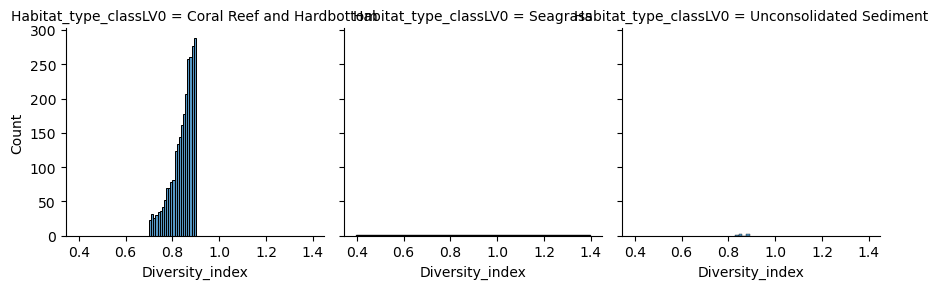

In [39]:
#in function of the region, no.divers and habitat
g = sns.FacetGrid(data=mean_div_ind,col="Region")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=mean_div_ind,col="no.divers")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=mean_div_ind,col="Habitat_type_classLV0")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

In [32]:
#observation above the quartile 3 and associated with a high diversity meaning under 0.9
high_div_ind = df1[df1.Diversity_index > 0.9]
high_div_ind
#represent 1003 observation over the 3999 (30%)

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,23.578271,577.431946,6.950751,Coral Reef and Hardbottom,Spur and Groove,91742,1057990,-6.0,1048.528198,7731.371094,0,733,Open,37045,43641,8378,1.675894,0,70,126,74.0,11501368.00,2.123427e+04,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.403795,503,0.382000,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
6,5157285_104U,impact,2005,July,24.474067,-81.739067,8.696966,FLA KEYS,25.018963,1.149431,23.673700,547.846313,6.674624,Coral Reef and Hardbottom,Pavement,101151,1067710,-9.0,1082.842773,1389.949463,39,733,Open,39426,48049,9483,1.720457,0,76,126,133.0,10456858.00,1.874080e+05,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.389774,3052,0.387980,2005,SPGR_LR,FLA KEYS,25.018963,1.149431,4,0.934887
10,5224799_107U,biomass,2005,July,24.499633,-81.703300,5.710949,FLA KEYS,10.837342,1.039747,23.603601,629.375488,6.764345,Coral Reef and Hardbottom,Individual or Aggregated Patch Reef,119220,1072006,-7.0,2941.421387,4452.691406,178,733,Closed,39670,48056,9484,0.000000,0,76,126,133.0,18679124.00,8.111606e+05,5.417427,0.446,0.295,0.235,0.480,855670.2,0.332746,9732,0.382000,2005,ISOL_MR,FLA KEYS,10.837342,1.039747,8,0.925702
17,5337315_136U,impact,2005,August,24.527983,-81.644533,5.200000,FLA KEYS,25.019405,0.851358,23.555322,855.765747,6.773651,Coral Reef and Hardbottom,Individual or Aggregated Patch Reef,128456,1084435,-7.0,4600.000000,9142.640625,67,745,Open,40853,48057,9484,1.720457,0,76,177,94.0,29178080.00,2.984734e+06,5.417427,0.911,0.244,0.515,0.277,855670.2,0.318031,8648,0.382000,2005,ISOL_MR,FLA KEYS,25.019405,0.851358,4,0.902030
18,5371071_139U,biomass,2005,August,24.538883,-81.626467,5.638251,FLA KEYS,15.000000,0.704700,23.543878,944.919617,6.740881,Coral Reef and Hardbottom,Individual or Aggregated Patch Reef,134253,1089820,-5.0,5600.000000,7839.696777,10,753,Open,41678,48057,9484,1.720457,0,76,177,94.0,33429208.00,4.083830e+06,1.951333,0.911,0.244,0.515,0.277,855670.2,0.310444,3218,0.382000,2005,ISOL_MR,FLA KEYS,15.000000,0.704700,4,0.938920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,1337948_1006U,biomass,2018,September,24.616172,-81.391337,2.544211,FLA KEYS,4.317534,1.651930,23.269830,830.504639,6.743567,Coral Reef and Hardbottom,Pavement,159535,1158999,-4.0,8241.420898,8236.752930,38,230,Closed,8414,57010,11480,0.000000,0,91,62,107.0,56748748.00,2.855254e+06,53.018750,-0.013,-0.027,-0.185,-0.056,855670.2,0.052741,6521,0.396981,2018,ISOL_HR,FLA KEYS,4.317534,1.651930,2,0.913313
3982,1491926_3120U,biomass,2018,September,26.164798,-80.080664,17.610381,SEFCRI,1.247837,1.399135,24.288141,339.872101,7.345778,Coral Reef and Hardbottom,Aggregate Reef,49010,780342,-18.0,400.000000,17389.949220,1391,3655,Open,1089358,4047664,115760,48.490343,6,41,42,1731.0,0.00,2.666004e+04,41.571117,-0.158,-0.129,-0.260,-0.185,170631.4,22.227260,6665,0.694000,2018,LIRM,SEFCRI,1.247837,1.399135,2,0.906852
3984,1928123_3051U,biomass,2018,September,25.864946,-80.104121,6.500517,SEFCRI,4.251293,0.949224,24.226709,375.817474,7.402822,Coral Reef and Hardbottom,Aggregate Reef,83483,935056,-9.0,1400

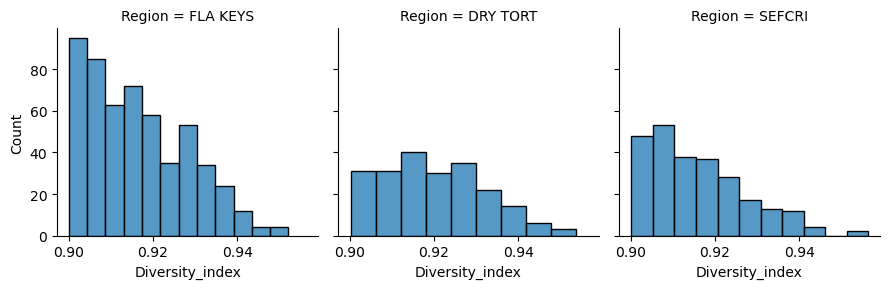

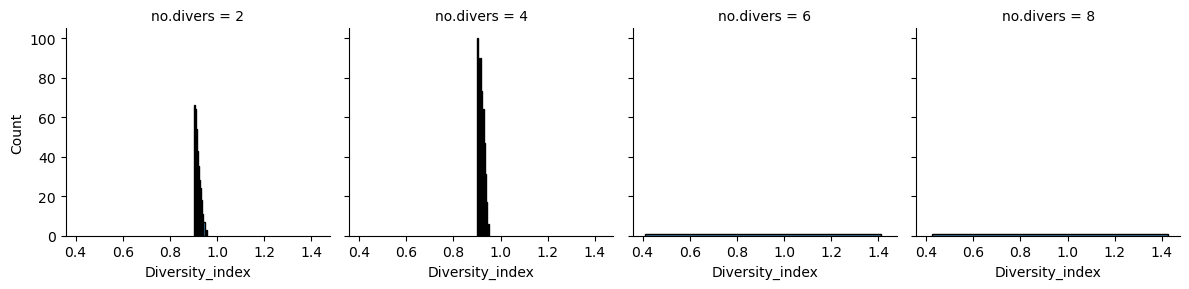

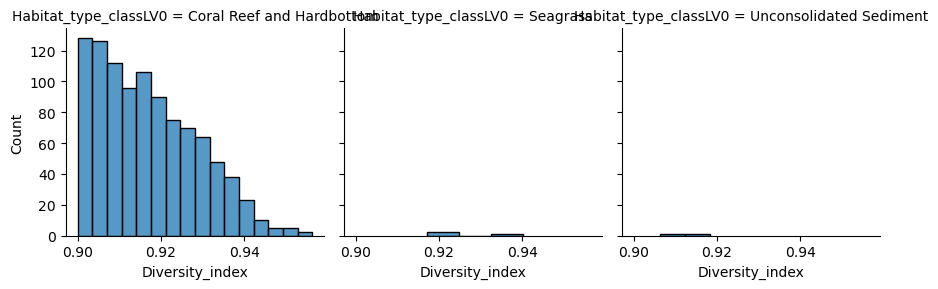

In [33]:
#in function of the region, no.divers and habitat
g = sns.FacetGrid(data=high_div_ind,col="Region")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=high_div_ind,col="no.divers")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

g = sns.FacetGrid(data=high_div_ind,col="Habitat_type_classLV0")
g.map(sns.histplot,"Diversity_index")
plt.tight_layout()
plt.show()

For the value below the 0.7 which reprensent for us a low diversity index and correspond to 10% of the all observation, we observed the presence of observations for all the region, the no.divers and habitat_type_class especially for the two last for the no.divers equal to 2 and 4 and for the coral reef and hardbottom. For the others class of these 2 features we get few observations. For the regions it seems we get observations for SEFCRI and FLA KEY principally for Dry tortugas we have less observations. This is also true for the diversity index between 0.7 and 0.9 which reprensent the core of the observation (65% of the total observations). 
For the core of the diversity index around the mean of 0.8 we observed we have no observations for the no.divers equal 6 and 8 and very few for the habitat_type_classLV0 equal to seagrass and uncosolidated sediment. For the region we have observation for all of them but less for the region of Dry tortuga. 
For the high diversity, which represent for us a diversity index over 0.9 and represent 30% of the entired observations we saw observation for the 3 regions but very few abour Dry tortuga. Perhaps we have very few observations for the no.divers equal to 6 and 8 as well as for the habitat_type_classLV0 equal to seagrass and unconsolidated sediment. 

We can think that:
- the Dry tortugas region seems to have a low diversity of fish because we see more observations at a diversity index below 0.7 than above 0.7.
- the observation no.divers equal to 6 and 8 seems to be not usefull because they contain few observation related to the diversity index except for values below 0.7 and above 0.9. 
- it seems that, the habitat_type_classLV0 corresponding to coral reef and hardbottom contain the core of the observation and for the other habitat type we get few information. Moreover in the article the authors point that, the habitat isn't influence the fish abundance. 

## To conclude here:
- The diversity index is a continuous value highly concentrate around 0.8. 
- It seems to be highly linked with categorical features: regions, habitat_type_classLV0, and no.divers. Moreover we get few information about the diversity index for the categories 6 and 8 of the no.divers as well as the seagrass and the unconsolidated sediement categories of the habitat_type_classLV0. The region dry tortugas seems to be the region with the lowest diversity index compared to the others region. The FLA Key seems to be the region with the highest diversity index. 
- The above cited categorical variable are also important in the data set for the observation of the different variables. With this we will be able to completing the missing values. 
- The diversity index shows positive correlation with: diversity index and SST, Coral_aera_UFRTM_20km, Depth_Sbrocco, Marina_slips_10km, SG_permit_50km, Nursery_seagrass, impact and negatively with: PCT_CORAL, MAX_HARD_RELIEF, Depth, Coral_cover, Reef_complexity.
- All of those variables are highly correlated between them suggesting they are necessary for predicting the diversity index. 

*For our model we decided to keep all of those variables cited above as predictive feature.
Because the diversity index, our target, is a continuous value we will use regression models such as linear regression, decision tree or ... for predicting the diversity index.* 

## Trait data set exploration

In [42]:
df2.head()

,Species,Sp,Family,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range
0,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.90,23.0,16.82,6.0,1.53883,1.538830,0.431022,pectoral,labriform,short and / or deep,2.50,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob
1,Acanthostracion quadricornis,Acanthostracion_quadricornis,OSTRACIIDAE,Acanthostracion,quadricornis,55.00,55.0,45.10,NaN,1.36959,1.369590,0.314511,dorsal_ventral,tetraodontiform,short and / or deep,3.30,1,30,80,1.0,80.0,79.0,2.68,27.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,1,BAL,pelagic,NO,YES,YES,-4.402829,1.317257,0,6902,mob
2,Acanthostracion polygonius,Acanthostracion_polygonius,OSTRACIIDAE,Acanthostracion,polygonius,50.00,50.0,41.00,NaN,0.38000,0.375069,NaN,dorsal_ventral,tetraodontiform,short and / or deep,3.23,1,42,90,3.0,80.0,77.0,2.03,2.0,H,is,0,day,solitary,sol,demersal,low,0.0,1,BAL,pelagic,NO,NO,NO,-0.916844,0.822614,0,5100,mob
3,Acanthurus bahianus,Acanthurus_bahianus,ACANTHURIDAE,Acanthurus,bahianus,46.48,381.0,38.10,7.0,2.42851,2.430000,0.887278,pectoral,labriform,short/deep,2.70,1,25,40,2.0,40.0,38.0,2.00,2.0,H,hd,0,day,shoaling,medg,demersal,low,0.0,1,PEL,pelagic,NO,YES,NO,-6.458161,-2.629728,0,1201,mob
4,Acanthurus chirurgus,Acanthurus_chirurgus,ACANTHURIDAE,Acanthurus,chirurgus,39.00,39.0,31.98,8.0,1.87360,1.867165,0.627862,pectoral,labriform,short/deep,2.30,1,15,25,2.0,25.0,23.0,2.09,2.0,H,hd,0,day,shoaling,medg,demersal,low,0.0,1,PEL,pelagic,NO,YES,NO,-6.180233,-3.265823,0,3688,mob


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Species                        120 non-null    object 
 1   Sp                             120 non-null    object 
 2   Family                         120 non-null    object 
 3   Genus                          120 non-null    object 
 4   Spec                           120 non-null    object 
 5   MaxLengthTL                    120 non-null    float64
 6   Body_size_max                  119 non-null    float64
 7   MaxLengthSL                    120 non-null    float64
 8   MaxJuvLength                   67 non-null     float64
 9   AspectRatio                    120 non-null    float64
 10  AspectRatio_Q                  120 non-null    float64
 11  Log_AR                         112 non-null    float64
 12  swim_type                      120 non-null    obj

In [44]:
df2.describe()

,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Nocturnal,Specialist,Fished,Relief,Coral,Cryptic,random
count,120.000000,119.000000,120.000000,67.000000,120.000000,120.000000,112.000000,119.000000,120.000000,120.000000,120.000000,119.000000,119.000000,119.000000,120.000000,119.000000,120.000000,118.000000,120.000000,109.000000,109.000000,120.000000,120.000000
mean,43.986750,90.361345,36.606083,11.208955,1.733621,1.728393,0.459358,3.934370,0.166667,32.525000,69.125000,2.310924,70.798319,68.487395,3.254917,27.327731,0.158333,0.406780,0.533333,4.522800,1.523872,0.091667,4852.683333
std,38.674115,137.771657,33.009805,7.312375,0.774097,0.781303,0.421621,2.006749,0.374241,36.503473,68.391921,3.931075,65.335585,64.327402,0.760697,15.339718,0.366584,0.493328,0.500979,7.271063,5.315977,0.289765,2903.997219
min,4.000000,4.000000,3.280000,3.000000,0.380000,0.375069,-0.784940,1.600000,0.000000,2.000000,3.000000,0.000000,8.000000,8.000000,2.000000,2.000000,0.000000,0.000000,0.000000,-13.971772,-10.247201,0.000000,35.000000
25%,15.240000,22.500000,12.500000,6.000000,1.197148,1.195903,0.179941,2.900000,0.000000,15.000000,25.000000,0.500000,30.000000,30.000000,2.680000,12.500000,0.000000,0.000000,0.000000,-0.575752,-1.162476,0.000000,2278.250000
50%,35.000000,46.000000,28.700000,9.000000,1.550755,1.550755,0.438712,3.500000,0.000000,25.000000,50.000000,1.000000,50.000000,49.000000,3.460000,34.000000,0.000000,0.000000,1.000000,5.131455,1.765955,0.000000,5061.000000
75%,57.000000,90.000000,48.367500,15.000000,2.063108,2.104204,0.724213,4.500000,0.000000,40.000000,91.250000,3.000000,91.000000,87.500000,3.740000,37.000000,0.000000,1.000000,1.000000,9.445818,3.199064,0.000000,7057.000000
max,200.000000,863.000000,178.880000,41.000000,4.515040,4.515040,1.507414,16.700000,1.000000,330.000000,400.000000,30.000000,400.000000,398.000000,4.510000,45.000000,1.000000,1.000000,1.000000,21.161932,41.486844,1.000000,9917.000000


In [45]:
df2.isna().sum()

Species                           0
Sp                                0
Family                            0
Genus                             0
Spec                              0
MaxLengthTL                       0
Body_size_max                     1
MaxLengthSL                       0
MaxJuvLength                     53
AspectRatio                       0
AspectRatio_Q                     0
Log_AR                            8
swim_type                         0
swim_mode                         0
body_shape                        0
Total.length.Body.depth.ratio     1
presence_defense                  0
ComDepthMax                       0
DepthMax                          0
Depth_min                         1
Depth_max                         1
Depth_range                       1
Troph                             0
Trophic_level                     1
Diet.x                            0
Diet.y                            1
Nocturnal                         0
Diel_activity               

**Description of the categorical variable in the trait dataset**

In [139]:
cat_data=df2.select_dtypes(exclude=np.number)

In [140]:
cat_data.describe()

,Species,Sp,Family,Genus,Spec,swim_type,swim_mode,body_shape,Diet.x,Diet.y,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Spawn,Spawning,Brackish,Multihabitat,Rafter,Home_range
count,120,120,120,120,120,120,120,120,120,119,119,120,119,120,119,119,119,120,120,120,119
unique,120,120,30,58,115,5,9,7,7,7,3,4,5,3,3,4,3,2,2,2,3
top,Abudefduf saxatilis,Abudefduf_saxatilis,LABRIDAE,Haemulon,chrysurus,pectoral,subcarangiform,fusiform,C,im,day,solitary,sol,demersal,low,PEL,pelagic,NO,YES,NO,mob
freq,1,1,24,9,2,53,43,37,52,57,101,71,53,101,80,86,90,106,73,103,71


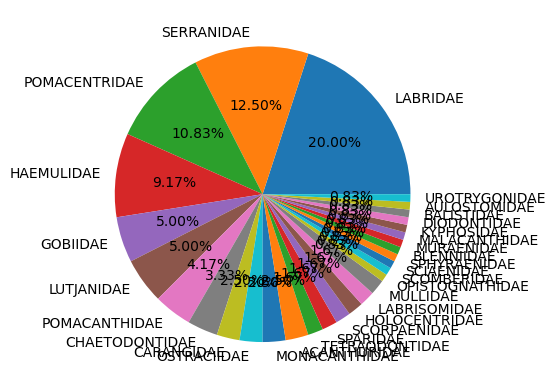

In [143]:
#the repartition of the observation accross the species family feature

plt.pie(df2['Family'].value_counts(),labels=df2['Family'].value_counts().index,autopct='%1.2f%%')
plt.show()

In [145]:
Family_nb_dif_Sp = df2.groupby('Family')['Sp'].unique().to_dict()
for keys in Family_nb_dif_Sp:
    nb_species = len(np.unique(Family_nb_dif_Sp[keys]))
    print(f'for the family: {keys} the number of different species is: {nb_species}')

for the family: ACANTHURIDAE the number of different species is: 3
for the family: AULOSTOMIDAE the number of different species is: 1
for the family: BALISTIDAE the number of different species is: 1
for the family: BLENNIIDAE the number of different species is: 1
for the family: CARANGIDAE the number of different species is: 3
for the family: CHAETODONTIDAE the number of different species is: 4
for the family: DIODONTIDAE the number of different species is: 1
for the family: GOBIIDAE the number of different species is: 6
for the family: HAEMULIDAE the number of different species is: 11
for the family: HOLOCENTRIDAE the number of different species is: 2
for the family: KYPHOSIDAE the number of different species is: 1
for the family: LABRIDAE the number of different species is: 24
for the family: LABRISOMIDAE the number of different species is: 2
for the family: LUTJANIDAE the number of different species is: 6
for the family: MALACANTHIDAE the number of different species is: 1
for the fa

In this dataset the half of the observations are objects. We have fewer lignes compared to the species dataset because it contain the information about the different fish find on the study sites (120 lignes agains 3 999 lignes).
 
For the categorical variables we observed that:
- 4 fish families (Labridae, serranidae, pomacentriade, haemuliade) shows a high number of different fish species present in the studying sites.
-  the most common swim type is pectoral and mode is subcarangiform. The most common body shape is fusiform and the most common diel activity is day.
-Surprinsingly the most common groupe size is solitary.
- Many demersal species engage in pelagic spawning suggesting an evolutionary and environmental advantage in the coral space for nutriment accessing, and birth enhancing their survival in that site. 

 We observed less missing values in this dataset compared to the trait dataset:
 | Features | Number of missing value | Description of the features with missing values |
|:---------:|:-------------------------:|:-----------------------------:|
|Body_size_max|             1| represent the maximum total length in cm overall and it is not used by the authors for their model|
| MaxJuvLength |               53| represent the maximum length of juvenile stages |
| Total.length.Body.depth.ratio|       1| which is a numerical variable describing body fineness; calculated by total length of fish divided by height at the pectoral fin |
|   Depth_min, Depth_max, Depth_range       |         1 for each| they represent each a paramater about the depth in the water we can find the fish|
|   Trophic_level        |         1| they represent trophic level of species and contain typo information. The author don't use it in their model and she is similar to the trophic variable.|
|  Diet.y        |         1| describe the fish diet and it is not use by the authors in their model|
|Diel_activity | 1| describe the moment of the day the fish is active (day, nigth or both) |
| Size_group | 1| described the type of group the fish is attached (solitary, paired, small group, medium group, large group)|
| Level_water | 1| common position of the fish in the column water, not used by the authors in their model|
| Specialist | 2 | which is a binary variable with 1 equal to the presence of the fish in the coral reefs|
| Relief | 11 | which represent the percent contribution of maximum hard relief to overall fish density derived from density models|
| Coral | 11 | represent the contribution of coral cover to overall fish density derived from density models|
| Home_range | 1| represent the size of home range meaning mobile, highly mobile, and sedentary|



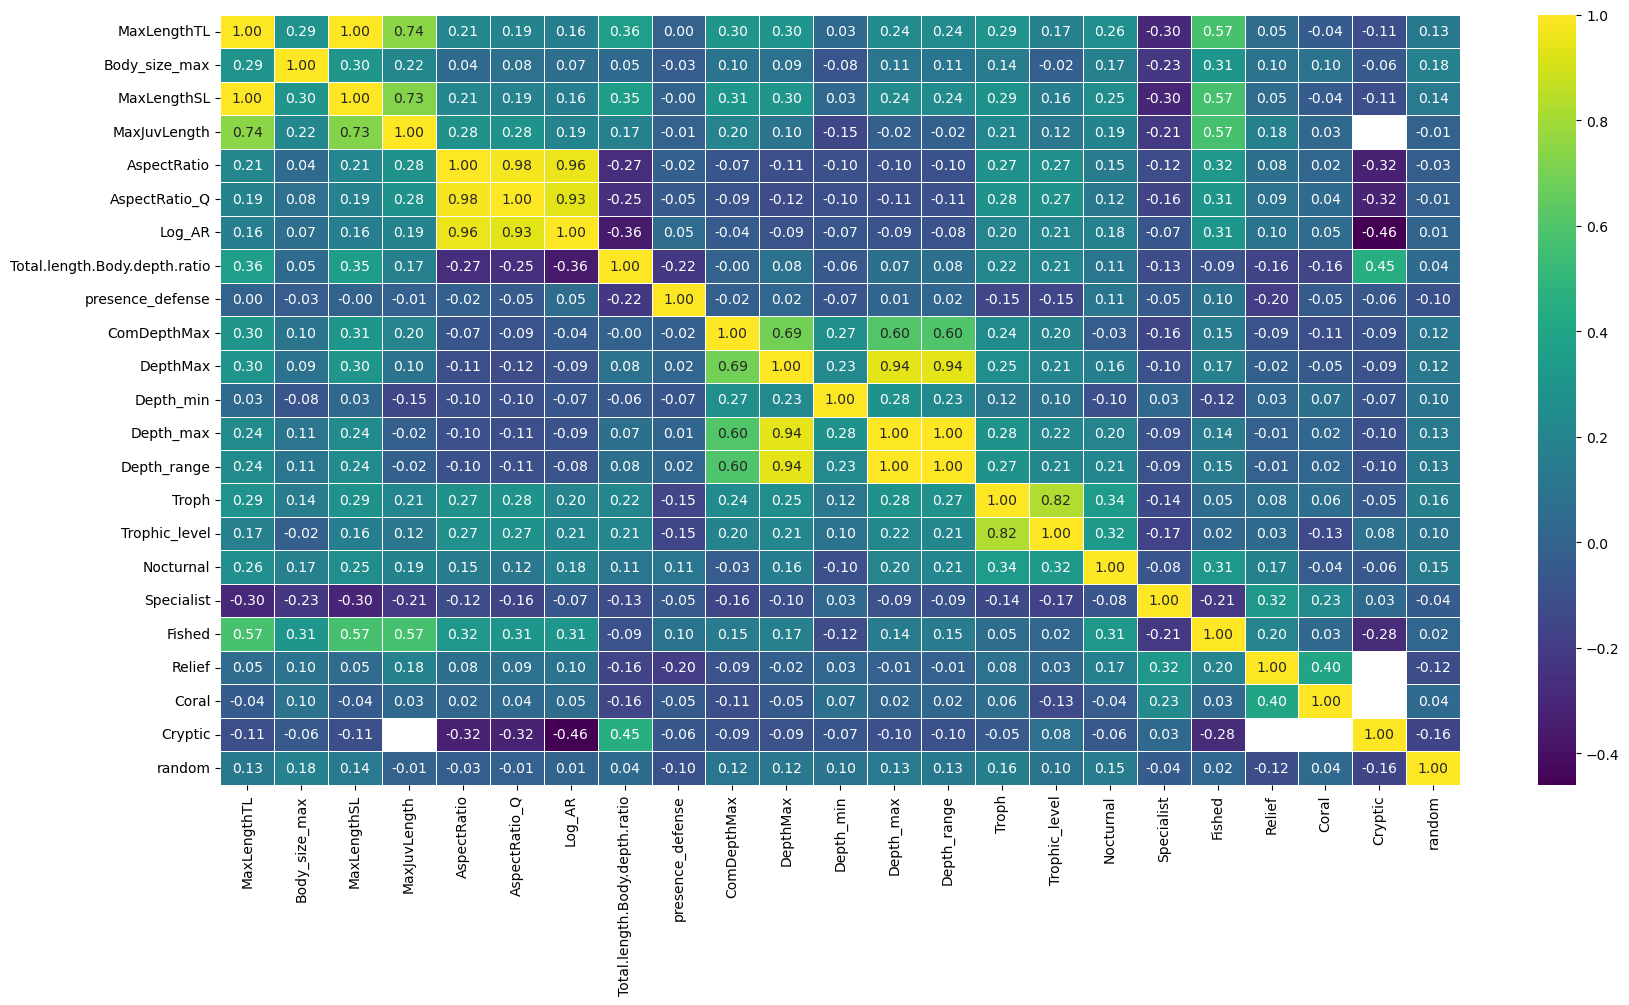

In [146]:
#correlation between the numeric value of the trait dataset
numerical=df2.select_dtypes(include=np.number)
corr=numerical.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".2f", cbar=True,linewidths=.5)
plt.show()

Here we look at the correlation between the coral and relief variable against the other features because the authors describe this 2 variables are realted to the diveristy index:
- it exist a positive correlation between the reflief and coral, fished, Specialist, nocturnal, Log_AR, MaxJuvLenght. Relief is negatively correlated with presence_defense and Total.length.body.depth.ratio.
- it exist a positive correlation between coral and relief, Specialist, Body_size_max. Coral is negatively correlated with trophic_level, ComDepthMax, Total.lenght.body.depth.ratio

To look the correlation closely between those variables we will reduce the data set to this variables. 

In [147]:
numerical.columns

Index(['MaxLengthTL', 'Body_size_max', 'MaxLengthSL', 'MaxJuvLength',
       'AspectRatio', 'AspectRatio_Q', 'Log_AR',
       'Total.length.Body.depth.ratio', 'presence_defense', 'ComDepthMax',
       'DepthMax', 'Depth_min', 'Depth_max', 'Depth_range', 'Troph',
       'Trophic_level', 'Nocturnal', 'Specialist', 'Fished', 'Relief', 'Coral',
       'Cryptic', 'random'],
      dtype='object')

In [149]:
px.imshow(numerical.loc[:, ['MaxJuvLength', 'Log_AR',
       'Total.length.Body.depth.ratio', 'presence_defense', 'ComDepthMax', 'Troph',
       'Trophic_level', 'Nocturnal', 'Specialist', 'Fished', 'Relief', 'Coral']].corr())

Like with the species dataset, the variables potentialy correlated with relief and coral shows high correlation between them. 
Maybe those features will help to predict the diversity index. 

After that we evaluate the links between the categorical values and the coral/relief diversity columns.  

In [150]:
categorical_data=df2.select_dtypes(include=['object'])

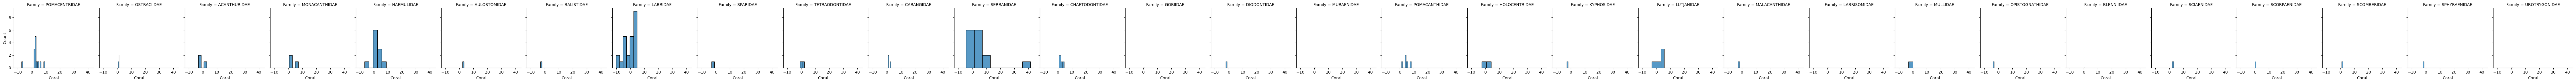

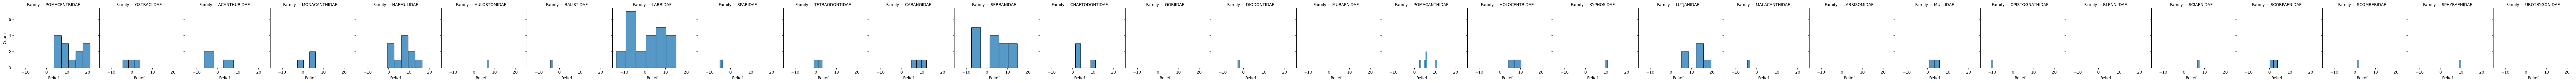

In [151]:
#Evaluation of the coral and relief distribution in function of the fish families

g = sns.FacetGrid(data=trait,col="Family")
g.map(sns.histplot,"Coral")
plt.tight_layout()
plt.show()

h = sns.FacetGrid(data=trait,col="Family")
h.map(sns.histplot,"Relief")
plt.tight_layout()
plt.show()

These plot shows that:
- We find more divers family in the relief aera compared to the coral where all the family are present in relief but not in coral
- the predominante families (Pomacentridae, Haemuliadae, Cabiridae, Semavidae, Lutjanidae) are present in the both site with more in relief compared to coral. 

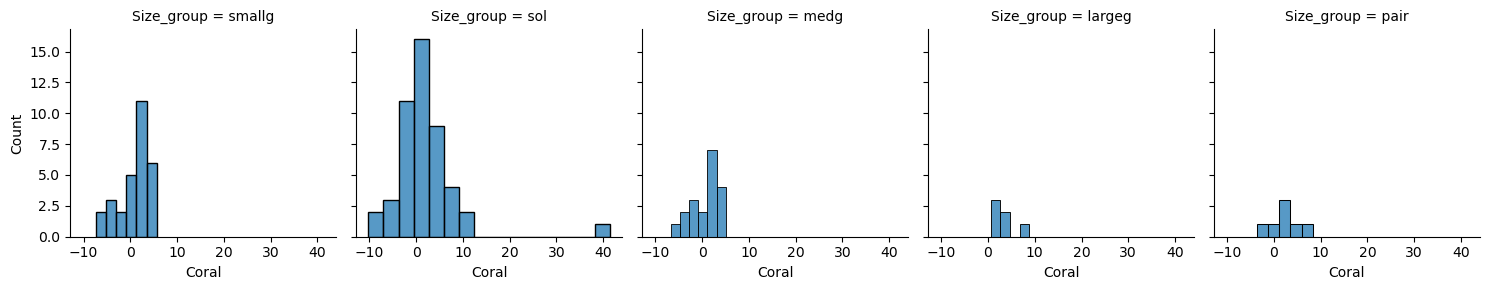

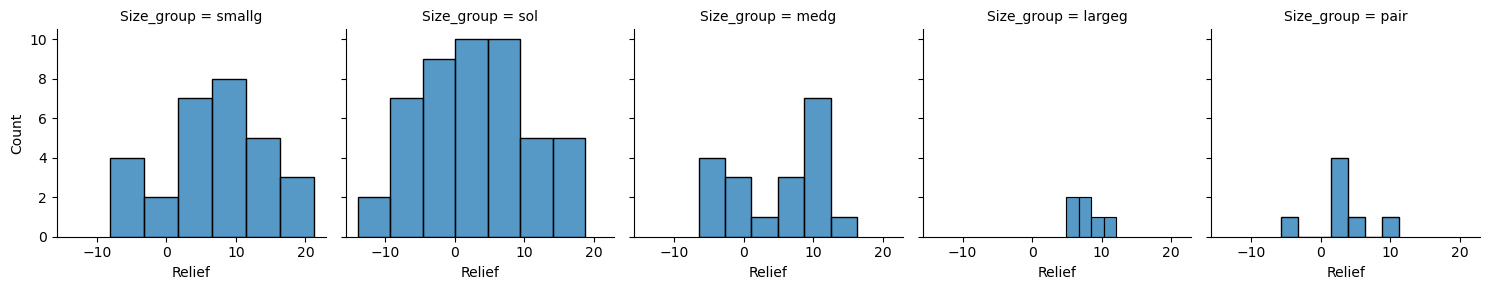

In [152]:
#The relation between size_group and coral/relief variables

g = sns.FacetGrid(data=trait,col="Size_group")
g.map(sns.histplot,"Coral")
plt.tight_layout()
plt.show()

h = sns.FacetGrid(data=trait,col="Size_group")
h.map(sns.histplot,"Relief")
plt.tight_layout()
plt.show()

In coral we find more solitary fish and few large group and paired. In relief we mostly find small groups, solitary, and median group. 
Maybe the fact the fish present in relief are more in group (small and median) compared to the coral which they are more solitary can suggest more diversity in coral compared to relief and/or different type of fish in this 2 types of environment. 

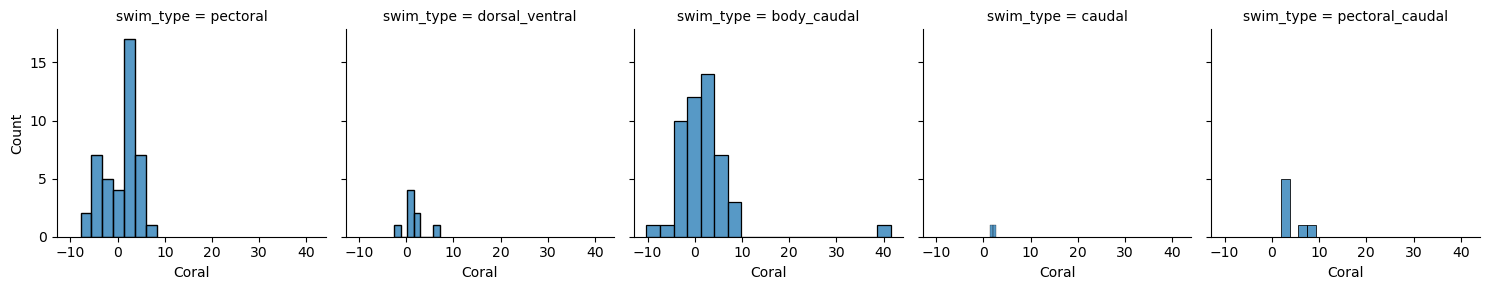

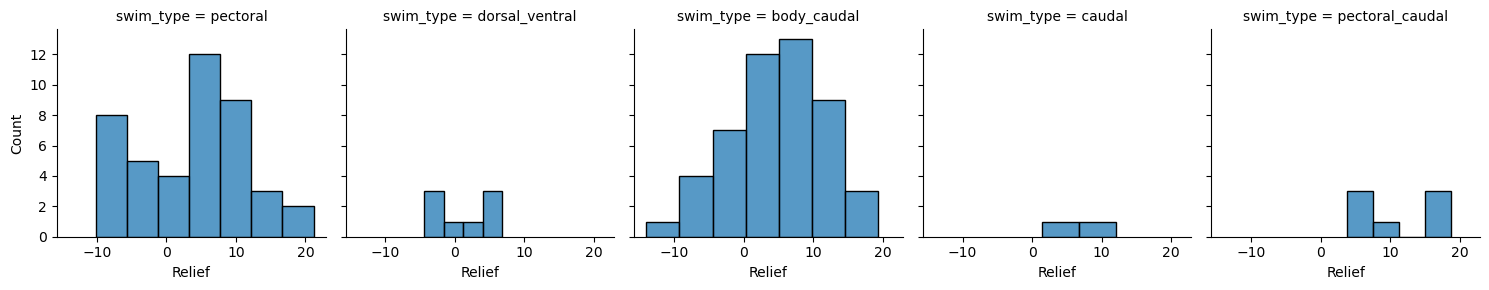

In [156]:
#relation between coral and releif and the swim type

g = sns.FacetGrid(data=trait,col="swim_type")
g.map(sns.histplot,"Coral")
plt.tight_layout()
plt.show()

h = sns.FacetGrid(data=trait,col="swim_type")
h.map(sns.histplot,"Relief")
plt.tight_layout()
plt.show()

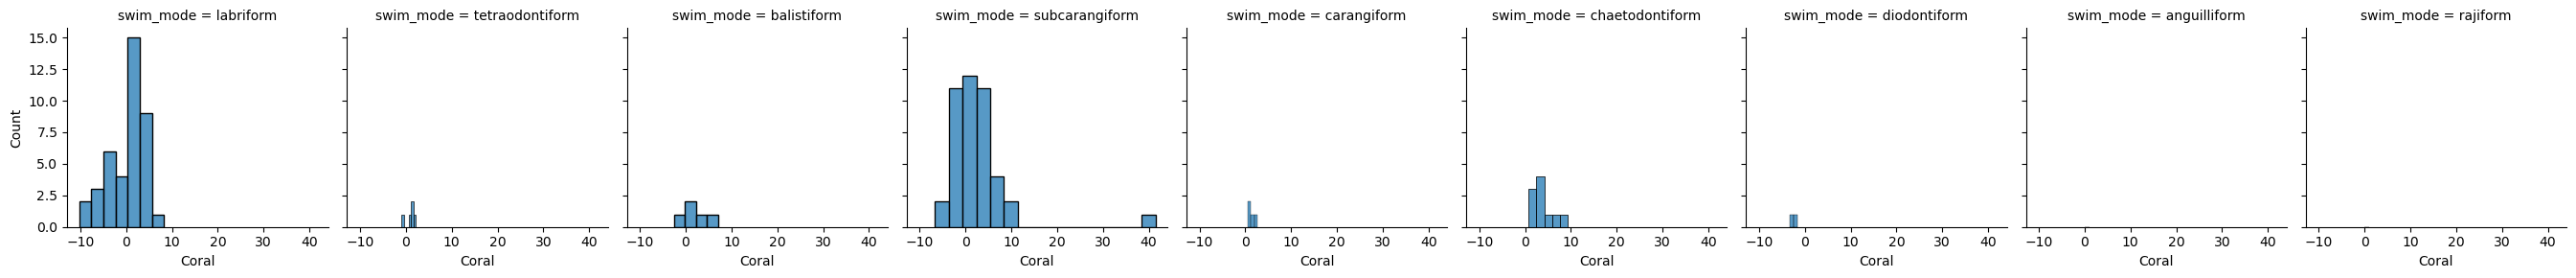

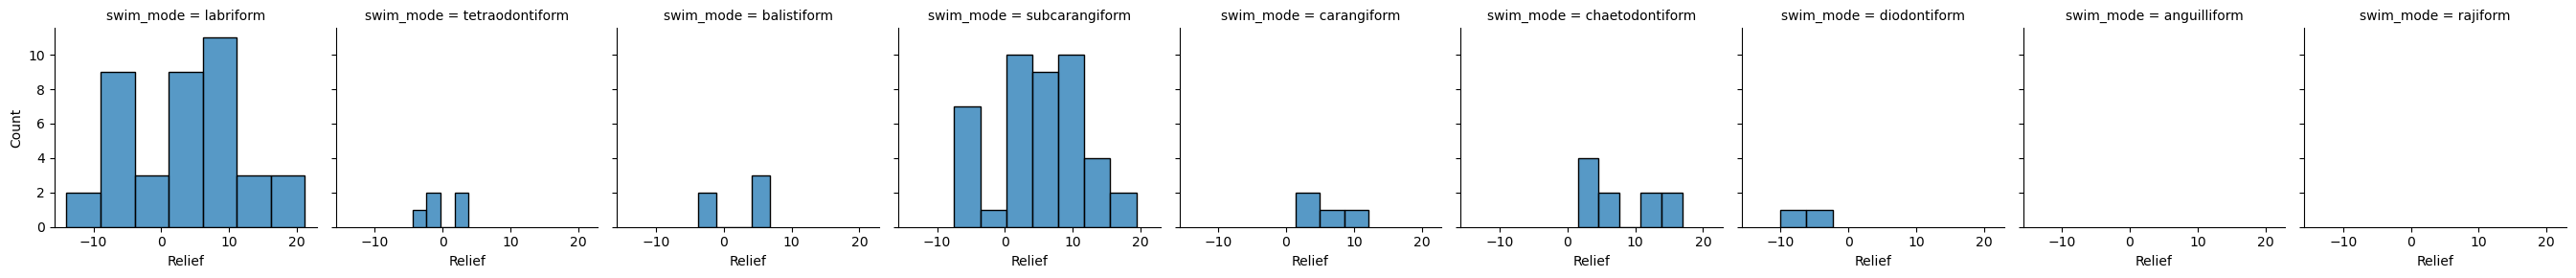

In [157]:
#relation between coral and releif and the swim mode

g = sns.FacetGrid(data=trait,col="swim_mode")
g.map(sns.histplot,"Coral")
plt.tight_layout()
plt.show()

h = sns.FacetGrid(data=trait,col="swim_mode")
h.map(sns.histplot,"Relief")
plt.tight_layout()
plt.show()

## To conclude on the trait table exploration:

In this dataset the diversity index is symbolized by the coral and relief variables where they are represent the percent contribution of coral or relief cover to overall fish density derived from density models. After the exploration of the data we see that:
- the numerical variables : MaxJuvLength, Log_AR, Total.length.Body.depth.ratio, presence_defense, ComDepthMax, Troph, Nocturnal, Specialist, and Fished shows positive or negative correlation with the relief or coral suggesting they can be usefull to predict the fish diversity index. 
- for the categorical column the swim type and mode shows the same pattern for the 2 environments but we find more solitary fish in the coral compared to the relief where they are more in small and median group size suggesting the groupe_size can help to predict the fish diversity. 
- We observed 4 dominantes family of fish in that data set : Labridae, serranidae, pomacentriade, haemuliade. In the litterature it is describe the number of different species per familly present in a site can be a clues of diversity (Loiseau and Gaertner *et al*, 2015). *This features doesn't exist in this data set but it will be maybe interesting to creating it by counting the number of species per family divided by the total of family observed in the study.*

To help predict the diversity index we think to link the 2 tables together and add the variables we find here interesting to predict the diversity index to the species table. For that we prose to pass by the SpecAbund table which contain the fish species name in column header and the no.divers as well as most of the varaibles find in the species dataset. Below the step for add the no.divers column from the SpecAbund table to the trait table for merge the trait and species table together. 

In [50]:
#SpecAbund table
SpecAbund = pd.read_excel("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/Resources/doi_10_5061_dryad_xpnvx0kmn__v20230901/SpecAbund.xlsx")

In [51]:
SpecAbund.head()

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Marine_reserve,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity_intercept,Total_gravity,Keys_Divisions,FKNMS,DryTortugas,BNP,CoralECA,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Abudefduf.saxatilis,Acanthurus.bahianus,Acanthurus.chirurgus,Acanthurus.coeruleus,Acanthostracion.polygonius,Acanthostracion.quadricornis,Acanthurus.sp.,Aluterus.scriptus,Anisotremus.surinamensis,Anisotremus.virginicus,Aulostomus.maculatus,Balistes.capriscus,Bodianus.rufus,Calamus.calamus,Calamus.penna,porgy.species,Cantherhines.pullus,Canthigaster.rostrata,Carangoides.bartholomaei,Caranx.crysos,Caranx.ruber,Cephalopholis.cruentata,Cephalopholis.fulva,Chaetodon.capistratus,Chaetodon.ocellatus,Chaetodon.sedentarius,Chaetodon.striatus,Chromis.cyanea,Chromis.enchrysura,Chromis.insolata,Chromis.multilineata,Chromis.scotti,Clepticus.parrae,Coryphopterus.dicrus,Coryphopterus.glaucofraenum,Coryphopterus.personatus,Cryptotomus.roseus,Diodon.holocanthus,Elacatinus.oceanops,Epinephelus.adscensionis,Epinephelus.morio,Gnatholepis.thompsoni,Gymnothorax.moringa,Haemulon.aurolineatum,Haemulon.carbonarium,Haemulon.chrysargyreum,Haemulon.flavolineatum,Haemulon.macrostomum,Haemulon.melanurum,Haemulon.parra,Haemulon.plumierii,Haemulon.sciurus,Haemulon.sp.,Halichoeres.bivittatus,Halichoeres.cyanocephalus,Halichoeres.garnoti,Halichoeres.maculipinna,Halichoeres.poeyi,Halichoeres.radiatus,Holocentrus.adscensionis,Holacanthus.bermudensis,Holacanthus.ciliaris,Holocentrus.rufus,Holocanthus.sp.,Holacanthus.tricolor,Hypoplectrus.gemma,Hypoplectrus.nigricans,Hypoplectrus.puella,Hypoplectrus.randallorum,Hypoplectrus.unicolor,Kyphosus.sectatrix,Lachnolaimus.maximus,Lactophrys.triqueter,Lutjanus.analis,Lutjanus.apodus,Lutjanus.griseus,Lutjanus.mahogoni,Lutjanus.synagris,Malacoctenus.macropus,Malacanthus.plumieri,Malacoctenus.triangulatus,Microspathodon.chrysurus,Monacanthus.tuckeri,Mulloidichthys.martinicus,Mycteroperca.bonaci,Mycteroperca.phenax,Ocyurus.chrysurus,Opistognathus.aurifrons,Pareques.acuminatus,Parablennius.marmoreus,Pomacanthus.arcuatus,Pomacanthus.paru,Pseudupeneus.maculatus,Ptereleotris.calliura,Pterois.volitans,Scarus.coelestinus,Scarus.coeruleus,Scarus.guacamaia,Scarus.iseri,Scarus.taeniopterus,Scarus.vetula,Scorpaena.plumieri,Scomberomorus.regalis,Serranus.baldwini,Serranus.tabacarius,Serranus.tigrinus,Serranus.tortugarum,Sparisoma.atomarium,Sparisoma.aurofrenatum,Sparisoma.chrysopterum,Sparisoma.radians,Sparisoma.rubripinne,Sparisoma.viride,Sphyraena.barracuda,Sphoeroides.spengleri,Stegastes.adustus,Stegastes.diencaeus,Stegastes.leucostictus,Stegastes.partitus,Stegastes.planifrons,Stegastes.variabilis,Thalassoma.bifasciatum,Urobatis.jamaicensis,Xyrichtys.splendens
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,23.595392,550.865051,6.992729,Coral Reef and Hardbottom,Aggregate Reef,88333,1040643,-10.0,1182.842773,3621.320313,0,391,Open,4163,41070,7446,1.649034,0,54,0,69.0,69.0,Marquesas,FKNMS,NaN,NaN,NaN,6483631.0,199409.31250,4.618931,-0.158,-0.129,-0.26,-0.185,1511066.2,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.0,36.0,24.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,0,0.0,4.0,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,16.0,0.0,200.0,76.0,0.0,72.0,36.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,12.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0,8.0,0.0,4.0,0,0.0,0,0.0,24.0,0.0,8.0,0.0,4.0,0.0,28.

In [123]:
#transpose all the column in rows except the no.divers
test2 = SpecAbund.groupby(['no.divers']).sum().transpose().stack(0).reset_index()
test2


,level_0,no.divers,0
0,site,2,5168534_472U5292294_494U5292333_457U5532305_63...
1,site,4,4733520_128U4966028_487U4981032_102U4999782_14...
2,site,6,5457301_143U5472306_063U
3,site,8,5224799_107U
4,model,2,biomassimpactbiomassimpactbiomassimpactimpactb...
...,...,...,...
703,Urobatis.jamaicensis,8,0.0
704,Xyrichtys.splendens,2,1590.664
705,Xyrichtys.splendens,4,5603.144
706,Xyrichtys.splendens,6,12.0


In [126]:
test3 = test2.rename(columns={"level_0":"merged"})
test3b = test3['merged'].str.replace('.', ' ')

In [127]:
test3b

0                      site
1                      site
2                      site
3                      site
4                     model
               ...         
703    Urobatis jamaicensis
704     Xyrichtys splendens
705     Xyrichtys splendens
706     Xyrichtys splendens
707     Xyrichtys splendens
Name: merged, Length: 708, dtype: object

In [128]:
test2bb = pd.concat([test2, test3b], axis = 1, join="outer")

In [131]:
test2bb

,level_0,no.divers,0,merged
0,site,2,5168534_472U5292294_494U5292333_457U5532305_63...,site
1,site,4,4733520_128U4966028_487U4981032_102U4999782_14...,site
2,site,6,5457301_143U5472306_063U,site
3,site,8,5224799_107U,site
4,model,2,biomassimpactbiomassimpactbiomassimpactimpactb...,model
...,...,...,...,...
703,Urobatis.jamaicensis,8,0.0,Urobatis jamaicensis
704,Xyrichtys.splendens,2,1590.664,Xyrichtys splendens
705,Xyrichtys.splendens,4,5603.144,Xyrichtys splendens
706,Xyrichtys.splendens,6,12.0,Xyrichtys splendens


In [136]:
test4 = test2bb.drop(['level_0',0], axis=1)

In [137]:
test4

,no.divers,merged
0,2,site
1,4,site
2,6,site
3,8,site
4,2,model
...,...,...
703,8,Urobatis jamaicensis
704,2,Xyrichtys splendens
705,4,Xyrichtys splendens
706,6,Xyrichtys splendens


In [138]:
#left join between the test2 dataframe and the trait to get the no.divers for each fish
trait_nodivers = pd.merge(left=df2, right= test4, how='left', left_on='Species', right_on='merged')
trait_nodivers

,Species,Sp,Family,Genus,Spec,MaxLengthTL,Body_size_max,MaxLengthSL,MaxJuvLength,AspectRatio,AspectRatio_Q,Log_AR,swim_type,swim_mode,body_shape,Total.length.Body.depth.ratio,presence_defense,ComDepthMax,DepthMax,Depth_min,Depth_max,Depth_range,Troph,Trophic_level,Diet.x,Diet.y,Nocturnal,Diel_activity,shoaling,Size_group,Position.in.water.column.,Level_water,Specialist,Fished,Spawn,Spawning,Brackish,Multihabitat,Rafter,Relief,Coral,Cryptic,random,Home_range,no.divers,merged
0,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,2.0,Abudefduf saxatilis
1,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,4.0,Abudefduf saxatilis
2,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,6.0,Abudefduf saxatilis
3,Abudefduf saxatilis,Abudefduf_saxatilis,POMACENTRIDAE,Abudefduf,saxatilis,22.9,23.0,16.82,6.0,1.53883,1.53883,0.431022,pectoral,labriform,short and / or deep,2.5,0,10,20,0.0,40.0,40.0,3.82,38.0,H,om,0,day,shoaling,smallg,demersal,low,1.0,1,DEM,demersal,NO,NO,YES,19.283335,2.155649,0,9316,mob,8.0,Abudefduf saxatilis
4,Acanthostracion quadricornis,Acanthostracion_quadricornis,OSTRACIIDAE,Acanthostracion,quadricornis,55.0,55.0,45.10,NaN,1.36959,1.36959,0.314511,dorsal_ventral,tetraodontiform,short and / or deep,3.3,1,30,80,1.0,80.0,79.0,2.68,27.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,1,BAL,pelagic,NO,YES,YES,-4.402829,1.317257,0,6902,mob,2.0,Acanthostracion quadricornis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,Urobatis jamaicensis,Urobatis_jamaicensis,UROTRYGONIDAE,Urobatis,jamaicensis,76.0,NaN,62.32,NaN,0.70000,0.70000,-0.356675,pectoral,rajiform,other,NaN,1,14,25,NaN,NaN,NaN,3.55,NaN,C,NaN,0,NaN,solitary,NaN,benthic,NaN,0.0,0,NaN,NaN,YES,YES,NO,NaN,NaN,1,1910,NaN,8.0,Urobatis jamaicensis
473,Xyrichtys splendens,Xyrichtys_splendens,LABRIDAE,Xyrichtys,splendens,17.5,175.0,14.35,NaN,1.38650,1.38650,0.326783,body_caudal,labriform,elongated,3.4,0,10,15,3.0,15.0,12.0,3.17,32.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,0,PEL,pelagic,NO,YES,NO,-13.971772,-10.247201,0,7029,mob,2.0,Xyrichtys splendens
474,Xyrichtys splendens,Xyrichtys_splendens,LABRIDAE,Xyrichtys,splendens,17.5,175.0,14.35,NaN,1.38650,1.38650,0.326783,body_caudal,labriform,elongated,3.4,0,10,15,3.0,15.0,12.0,3.17,32.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,0,PEL,pelagic,NO,YES,NO,-13.971772,-10.247201,0,7029,mob,4.0,Xyrichtys splendens
475,Xyrichtys splendens,Xyrichtys_splendens,LABRIDAE,Xyrichtys,splendens,17.5,175.0,14.35,NaN,1.38650,1.38650,0.326783,body_caudal,labriform,elongated,3.4,0,10,15,3.0,15.0,12.0,3.17,32.0,C,im,0,day,solitary,sol,demersal,bottom,0.0,0,PEL,pelagic,NO,YES,NO,-13.971772,-10.247201,0,7029,mob,6.0,Xyrichtys splendens


**Need to finish:**
- create the family diversity index if it is useful and informative
- link the 2 tables together and see the relation between all the variables we select for the models.